# **India's [NIFTY 50]Stock Market Prediction using DNN**

Some Points to consider:
1. All the paramters are fixed after trail and error method.
2. The models are highly dependent on the datasets used.
3. Models needs good amount of data to predict accurate results.
4. The Stock data is highly volatile in nature, though NIFTY

## Table of Contents
* [Abstract](#Abstract)
* [Importing Libraries](#library)
* [Importing Dataset](#dataset)
    * [Data Preprocessing](#preprocessing)
    * [Adding SMA Variable](#addsma)
    * [Data Normalization](#datanormal)
* [Splitting the data](#split)
* [LSTM Models](#lstm)
    * [Model 1.1](#model1)
    * [Model 1.2](#model2)
    * [Model 1.3](#model3)
    * [Model 1.4](#model4)
    * [Model 1.5](#model5)
    * [Model 1.6](#model6)
* [GRU Models](#gru)
    * [Model 2.1](#model7)
    * [Model 2.2](#model8)
    * [Model 2.3](#model9)
    * [Model 2.4](#model10)
    * [Model 2.5](#model11)
    * [Model 2.6](#model12)

# **IMPORTING LIBRARIES** <a class="anchor"  id="library"></a>

In [1]:
#Dataframe
import pandas as pd
import numpy as np
from numpy import sqrt
import math
#matplotlib
import matplotlib.pyplot  as plt
#Plotly
#!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#Computation
import sklearn
from sklearn.preprocessing import MinMaxScaler
#deep-learning models
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
#warnings
import warnings
warnings.filterwarnings('ignore')

# DATASET : **Data extracted from Yahoo Finance**

**IMPORT LIBRARY**

In [2]:
#!pip install yfinance 
import yfinance as yf

# **IMPORTING DATA** <a class="anchor"  id="dataset"></a>

In [3]:
df = yf.download("^NSEI",start="2011-01-01", end="2025-01-10")
df

[*********************100%***********************]  1 of 1 completed


Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2011-01-03   6157.600098   6178.549805   6147.200195   6177.450195       0
2011-01-04   6146.350098   6181.049805   6124.399902   6172.750000       0
2011-01-05   6079.799805   6141.350098   6062.350098   6141.350098       0
2011-01-06   6048.250000   6116.149902   6022.299805   6107.000000       0
2011-01-07   5904.600098   6051.200195   5883.600098   6030.899902       0
...                  ...           ...           ...           ...     ...
2025-01-03  24004.750000  24196.449219  23976.000000  24196.400391  312300
2025-01-06  23616.050781  24089.949219  23551.900391  24045.800781  278100
2025-01-07  23707.900391  23795.199219  23637.800781  23679.900391  262300
2025-01-08  23688.949219  23751.849609  23496.150391  23746.650391  266400
2025-01-09  23526.500000  23689.500000  23503.050781  23674.750000  269200

[3437 rows x 5 columns]

# **DATA PROCESSING** <a class="anchor"  id="preprocessing"></a>

In [4]:
nifty_50_df = df.fillna(method='ffill')

# **ADDING SIMPLE MOVING AVERAGE 50 DAYS[SMA50]** <a class="anchor"  id="addsma"></a>

In [5]:
nifty_50_df['SMA50'] = nifty_50_df['Close'].rolling(50).mean()

In [6]:
nifty_50_df.dropna(inplace=True)
nifty_50_df

Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2011-03-15   5449.649902   5497.850098   5373.649902   5420.000000       0   
2011-03-16   5511.149902   5535.100098   5475.950195   5475.950195       0   
2011-03-17   5446.649902   5510.049805   5435.299805   5455.399902       0   
2011-03-18   5373.700195   5483.049805   5366.399902   5475.350098       0   
2011-03-21   5364.750000   5413.299805   5348.200195   5408.750000       0   
...                  ...           ...           ...           ...     ...   
2025-01-03  24004.750000  24196.449219  23976.000000  24196.400391  312300   
2025-01-06  23616.050781  24089.949219  23551.900391  24045.800781  278100   
2025-01-07  23707.900391  23795.199219  23637.800781  23679.900391  262300   
2025-01-08  23688.949219  23751.849609  23496.150391  23746.650391  266400   
2025-01-09  23526.500000  23689.500000  23503.050781  23674.750000  269200   

Price              SMA50  
Ticker                    
Date                      
2011-03-15   5574.114990  
2011-03-16   5561.185986  
2011-03-17   5547.191982  
2011-03-18   5533.069990  
2011-03-21   5519.399990  
...                  ...  
2025-01-03  24131.654102  
2025-01-06  24115.265117  
2025-01-07  24101.435117  
2025-01-08  24091.598086  
2025-01-09  24075.345078  

[3388 rows x 6 columns]

## **Basic Graph Showing the Target Variable**

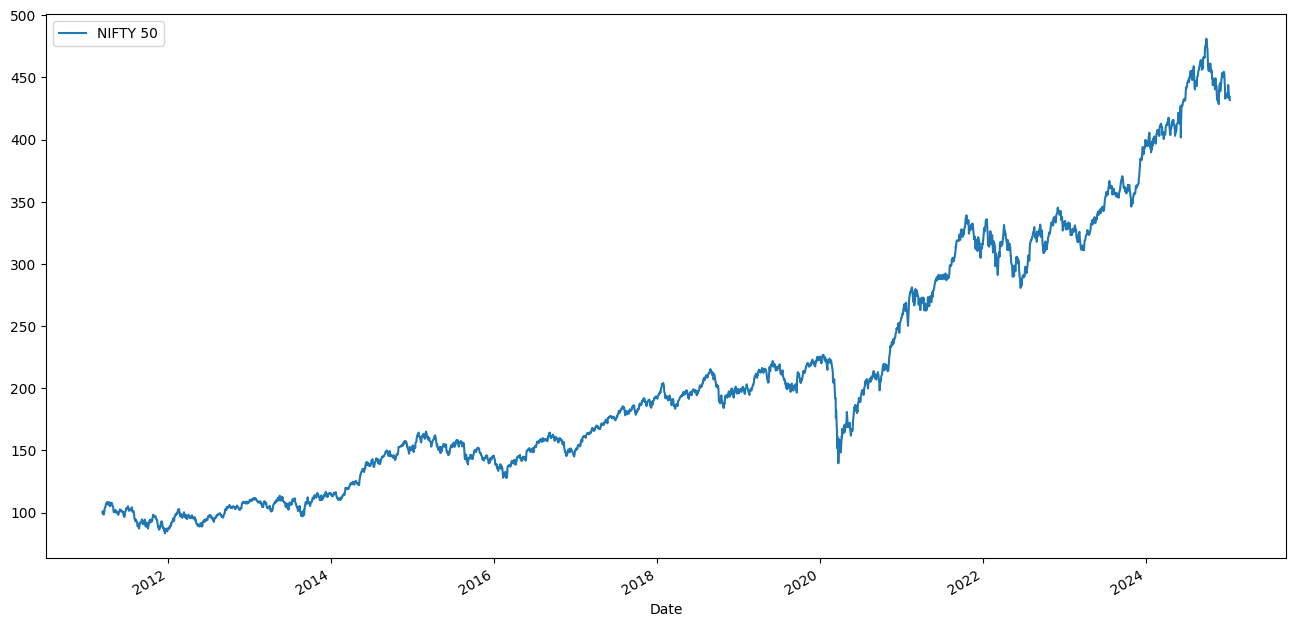

In [7]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_50_df.plot(figsize=(16, 8))
plt.legend(['NIFTY 50'])
plt.show()

**PLOTTING CLOSE PRICE AND SMA50**

<Axes: xlabel='Date'>

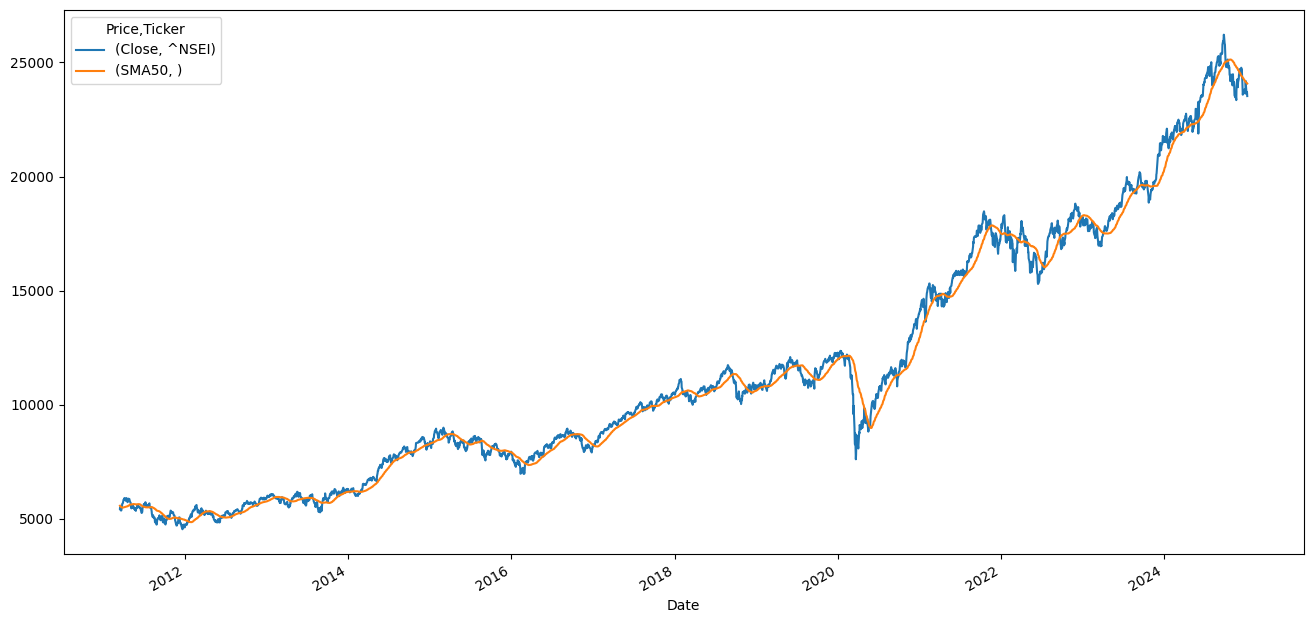

In [8]:
# plotting Close price and simple
# moving average of 50 days using .plot() method
nifty_50_df[['Close', 'SMA50']].plot(label='NIFTY50',
                                  figsize=(16, 8))

# **DATA NORMALIZATION** <a class="anchor"  id="datanormal"></a>

In [9]:
#X = nifty_50_df.drop(["Close","Adj Close", "Volume", "High", "Low", "SMA50"],axis=1)
#y = nifty_50_df["Close"]
#Creating a new dataframe with only the close column
data = nifty_50_df.filter(['Close'])
#I converted the dataframe into a numpy array
dataset = data.values
# Getting the number of rows to train the model on
training_data_len =math.ceil(len(dataset) * .8)
training_data_len

2711

In [10]:
# Ensure the data DataFrame is correctly populated
data = nifty_50_df[['Close']]

# Convert the dataframe into a numpy array
dataset = data.values

# Scaling the data, to apply preprocessing transformations
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(3388, 1)

# **SPLITTING THE DATA INTO TRAIN AND TEST SETS** <a class="anchor"  id="split"></a>

In [11]:
# Creating training dataset
train_data = scaled_data[0:training_data_len, :]

# spliting data into x and y 
x_train = []
y_train = []
for i in range (80, len(train_data)):
  x_train.append(train_data[i-80:i, 0])
  y_train.append(train_data[i, 0])
  if i<=85:
    print(x_train)
    print(y_train)
    print()

[array([0.04177999, 0.04461777, 0.04164156, 0.03827546, 0.03786247,
       0.04012809, 0.04319196, 0.04513688, 0.05122081, 0.05274353,
       0.05500914, 0.05737626, 0.05950345, 0.05914814, 0.06295032,
       0.06302413, 0.06217973, 0.06190057, 0.05988412, 0.05728629,
       0.06309105, 0.05907892, 0.05467461, 0.05521217, 0.0603294 ,
       0.06185443, 0.06138377, 0.06110229, 0.05951036, 0.05727476,
       0.05561592, 0.05339182, 0.0471141 , 0.04581749, 0.04225066,
       0.04647734, 0.04646119, 0.04600668, 0.04710487, 0.0434642 ,
       0.04616818, 0.04405714, 0.04128628, 0.04043955, 0.04078562,
       0.04347344, 0.03886837, 0.03925137, 0.03713342, 0.04005887,
       0.04300048, 0.04286205, 0.04834842, 0.04642658, 0.04487618,
       0.04558215, 0.0466942 , 0.04534222, 0.04507458, 0.04344805,
       0.04330962, 0.04412636, 0.04168079, 0.03933904, 0.0379386 ,
       0.03293211, 0.03376038, 0.03387342, 0.03579758, 0.04277668,
       0.04533069, 0.04619355, 0.04873834, 0.05090473, 0.0499

In [12]:
# Converting the dataset into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#making the data traineable
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 1 is just the number of features that is the closing price. 
x_train.shape

(2631, 80, 1)

In [13]:
#creating testing dataset
#scales values from 2168 to 2497
test_data= scaled_data[training_data_len -80: , :]
#x_test and y_test
x_test =[]
y_test = dataset [training_data_len:, :]
for i in range (80, len (test_data)):
  x_test.append(test_data[i-80:i, 0])

In [14]:
#converting test data to a numpy array
x_test=np.array(x_test) #so we can predict using LSTM model

#reshaping data from 2D to 3D for LSTM 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# **MODEL 1: LONG SHORT-TERM MEMORY [LSTM]** <a class="anchor"  id="lstm"></a>

## **MODEL 1.1**: INPUT LAYER(LSTM), HIDDEN LAYER(1LSTM), OPTIMIZER : ADAM & OUTPUT LAYER <a class="anchor"  id="model1"></a>

**1. MODEL CREATION**

In [15]:
# Building the model
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 80, 4)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 4)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [16]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [17]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0106
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 2.1893e-04
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 2.1112e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.6274e-04
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.6413e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.5263e-04
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.4628e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.3206e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.0994e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.1665e-04
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 1.2122e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.0272e-04
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 9.6632e-05
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1

**4. MODEL PREDICTION**

In [18]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


**5. MODEL ERROR**

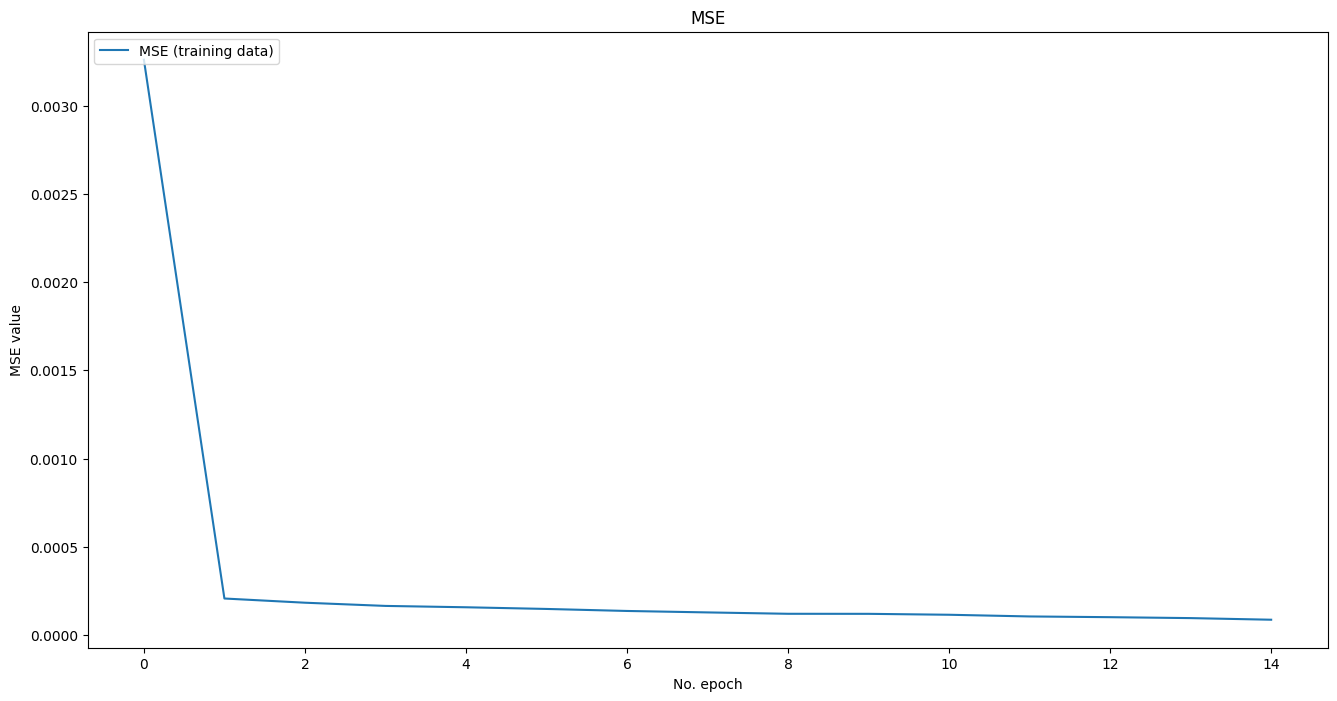

In [19]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [20]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

211.59321339549484

**6. GRAPHS OF PREDICTION**

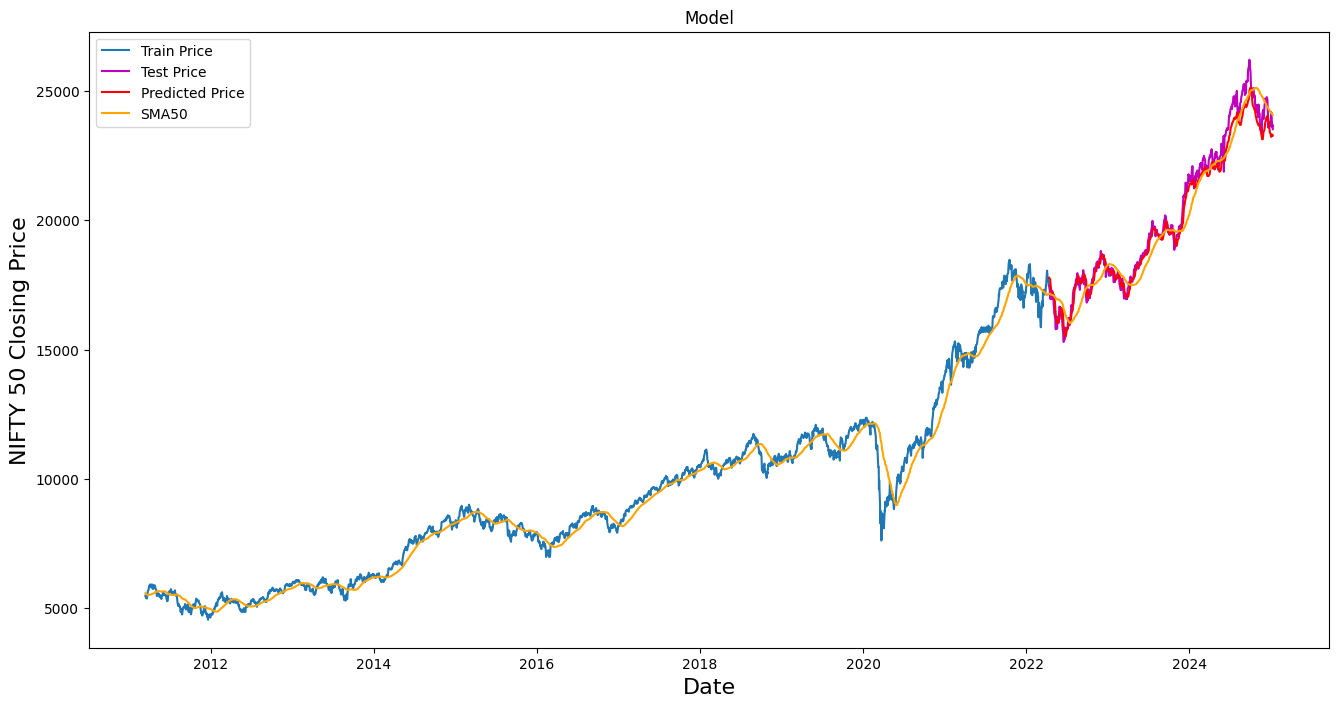

In [21]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [22]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17776.162109
2022-04-18  17173.650391  17720.806641
2022-04-19  16958.650391  17621.529297
2022-04-20  17136.550781  17484.652344
2022-04-21  17392.599609  17372.058594
...                  ...           ...
2025-01-03  24004.750000  23278.076172
2025-01-06  23616.050781  23323.480469
2025-01-07  23707.900391  23314.992188
2025-01-08  23688.949219  23300.011719
2025-01-09  23526.500000  23281.021484

[677 rows x 2 columns]

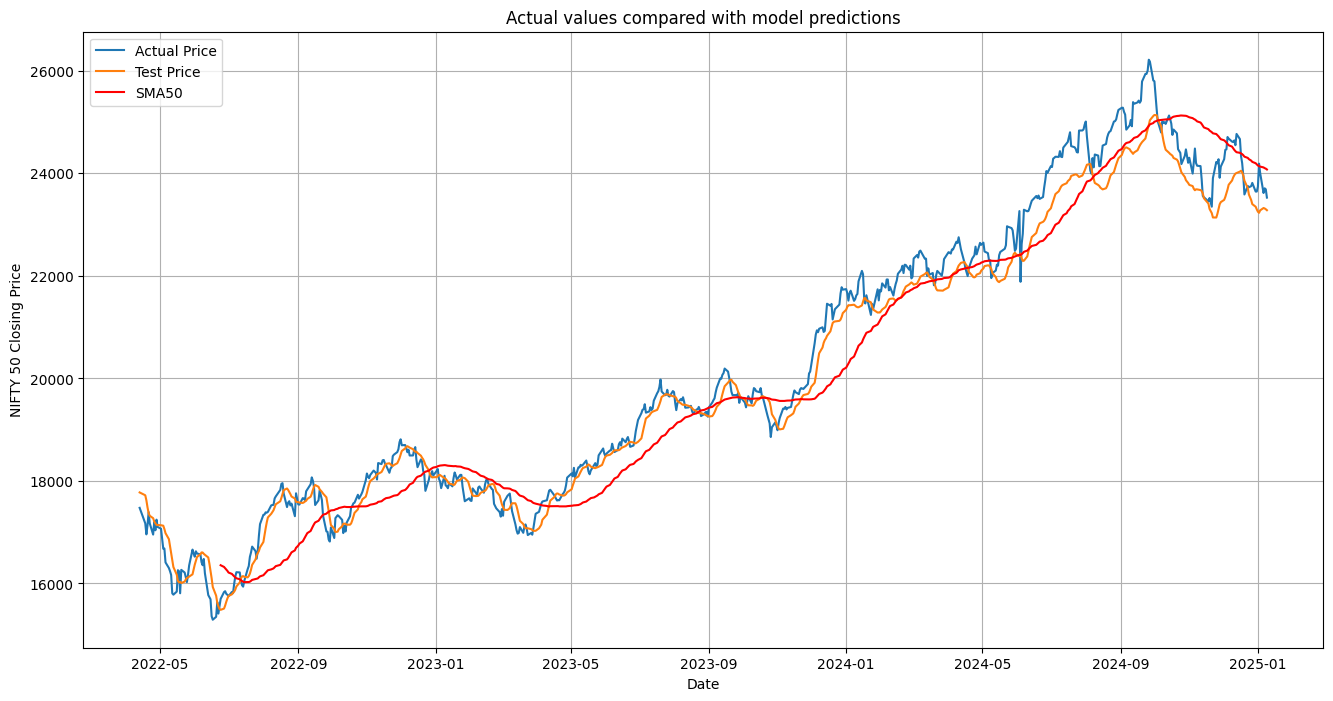

In [23]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 1.2**: INPUT LAYER(LSTM), HIDDEN LAYER(2LSTM), OPTIMIZER : ADAM & OUTPUT LAYER<a class="anchor"  id="model2"></a>

**1. MODEL CREATION**

In [24]:
# Building the model
model = Sequential()
model.add(LSTM(4, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(4, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 80, 4)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 80, 4)               │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 4)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 389 (1.52 KB)

 Trainable params: 389 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [25]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [26]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 0.0078
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 3.9058e-04
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 3.5814e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 3.4128e-04
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.8759e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 2.6552e-04
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.1885e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.1116e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.0278e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.1690e-04
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 1.6679e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 1.7765e-04
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 1.6024e-04
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/s

**4. MODEL PREDICTION**

In [27]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


**5. MODEL ERROR**

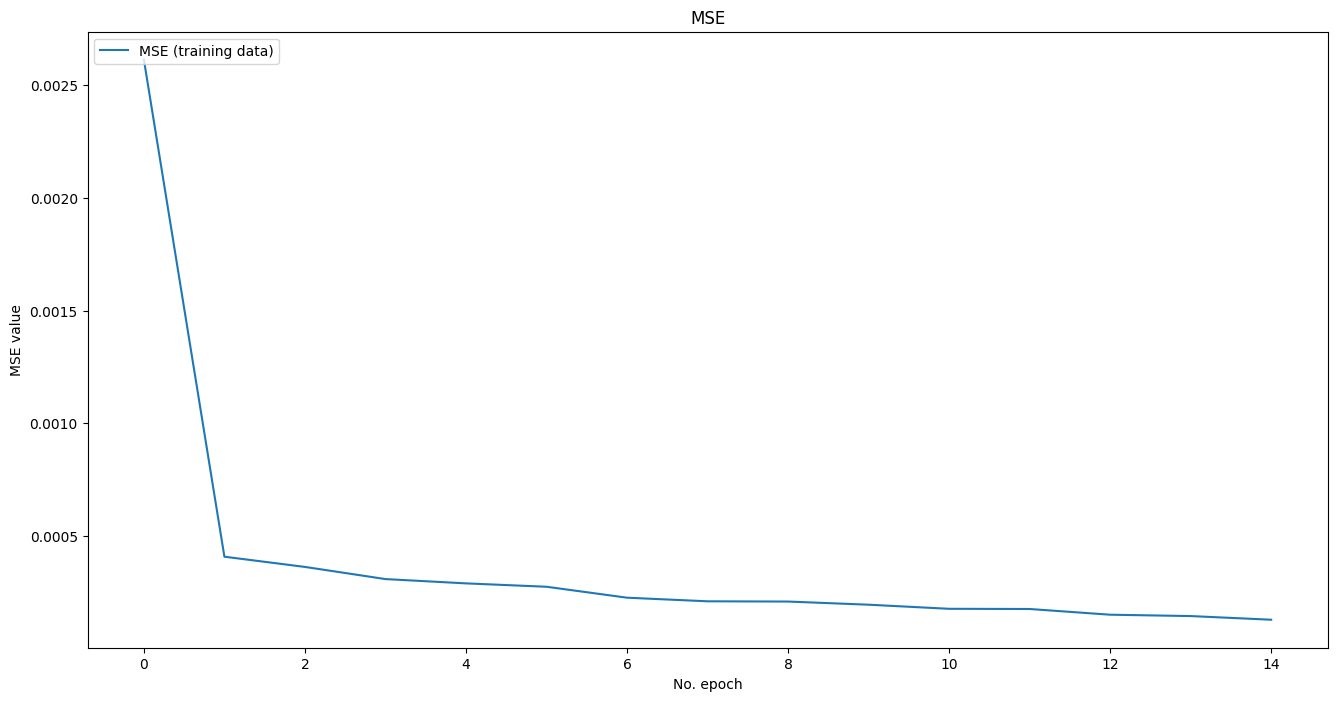

In [28]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [29]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

161.8783783004062

**6. GRAPHS OF PREDICTION**

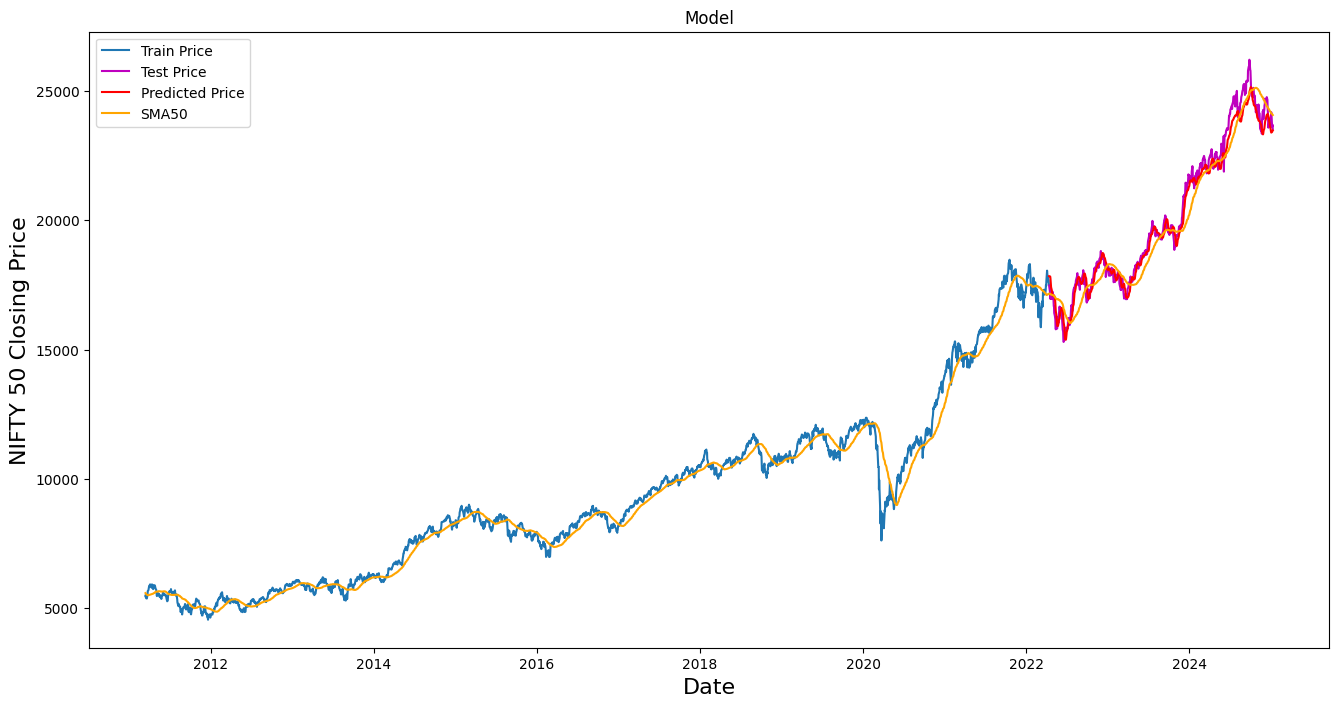

In [30]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [31]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17841.304688
2022-04-18  17173.650391  17826.361328
2022-04-19  16958.650391  17767.535156
2022-04-20  17136.550781  17663.417969
2022-04-21  17392.599609  17535.345703
...                  ...           ...
2025-01-03  24004.750000  23399.357422
2025-01-06  23616.050781  23425.132812
2025-01-07  23707.900391  23449.210938
2025-01-08  23688.949219  23468.406250
2025-01-09  23526.500000  23477.056641

[677 rows x 2 columns]

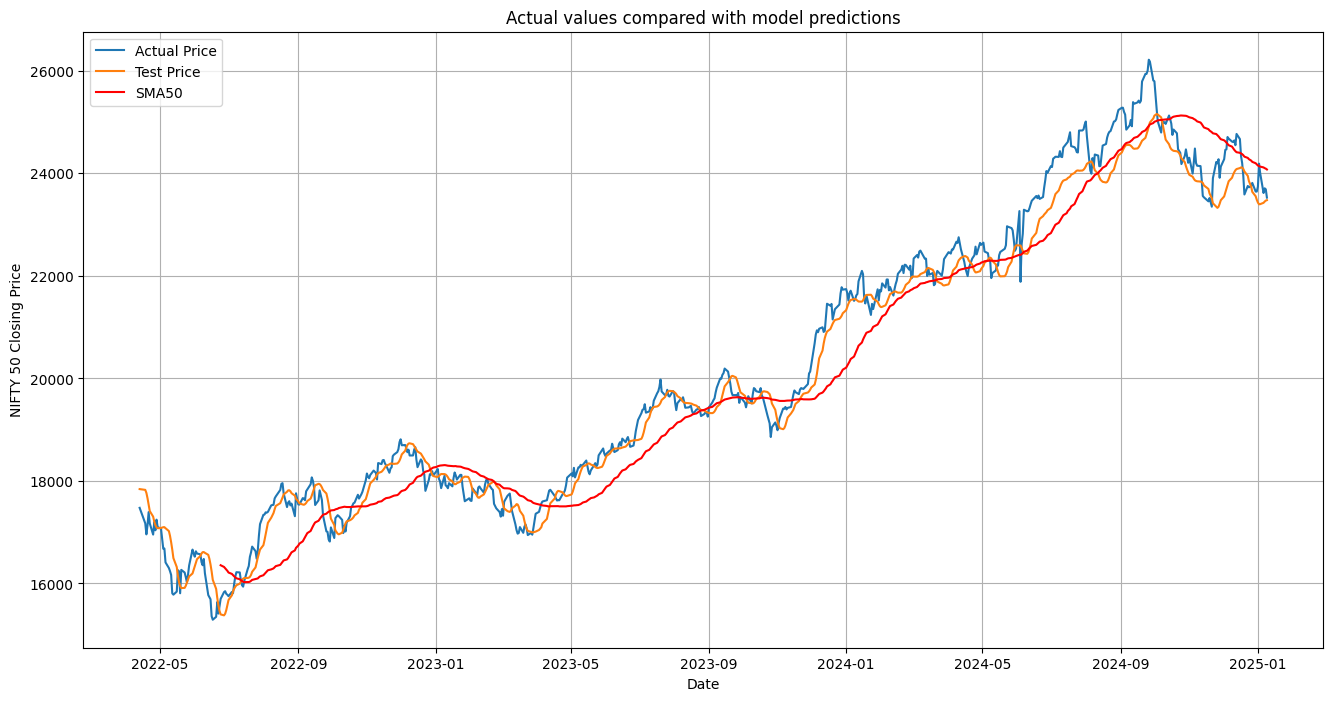

In [32]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 1.3**: INPUT LAYER(LSTM), HIDDEN LAYER(3LSTM), OPTIMIZER : ADAM & OUTPUT LAYER<a class="anchor"  id="model3"></a>

**1. MODEL CREATION**

In [33]:
# Building the model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(8, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 80, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 80, 16)              │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 80, 8)               │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 4)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,501 (33.21 KB)

 Trainable params: 8,501 (33.21 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [34]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [35]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - loss: 0.0073
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 3.6925e-04
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 2.6965e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 2.6196e-04
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 2.1474e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 2.3391e-04
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 2.2389e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 1.9904e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 2.0221e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 1.8744e-04
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - loss: 1.5384e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 1.5170e-04
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - loss: 1.4025e-04
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/s

**4. MODEL PREDICTION**

In [36]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


**5. MODEL ERROR**

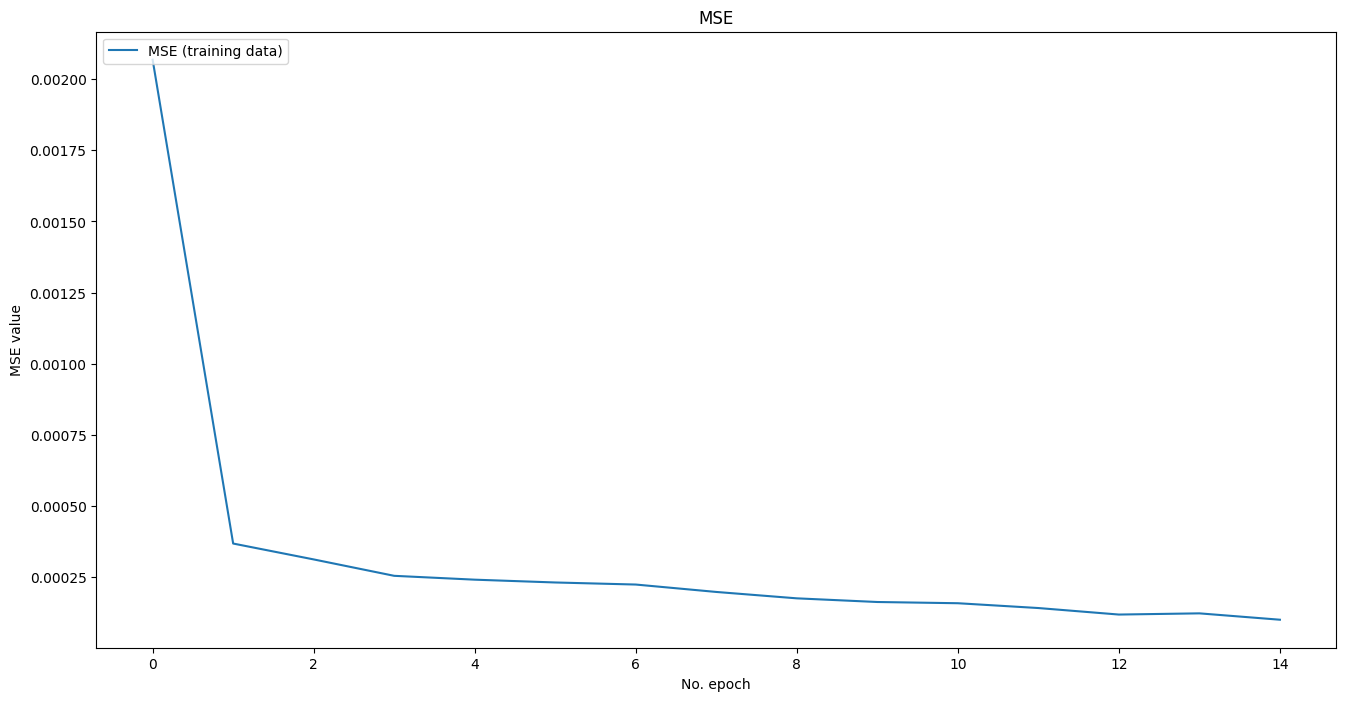

In [37]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [38]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1425.5496041820531

**6. GRAPHS OF PREDICTION**

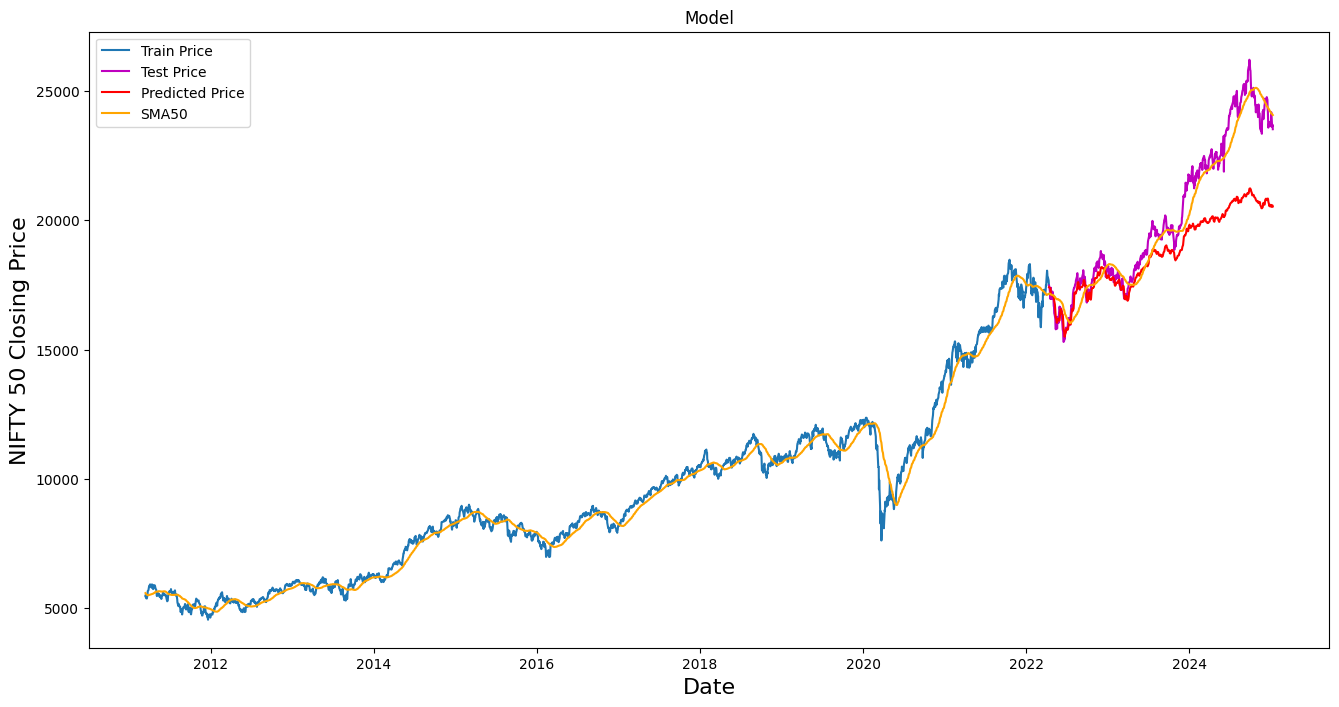

In [39]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [40]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17410.591797
2022-04-18  17173.650391  17378.041016
2022-04-19  16958.650391  17334.972656
2022-04-20  17136.550781  17251.095703
2022-04-21  17392.599609  17155.707031
...                  ...           ...
2025-01-03  24004.750000  20525.654297
2025-01-06  23616.050781  20564.267578
2025-01-07  23707.900391  20582.640625
2025-01-08  23688.949219  20569.519531
2025-01-09  23526.500000  20536.195312

[677 rows x 2 columns]

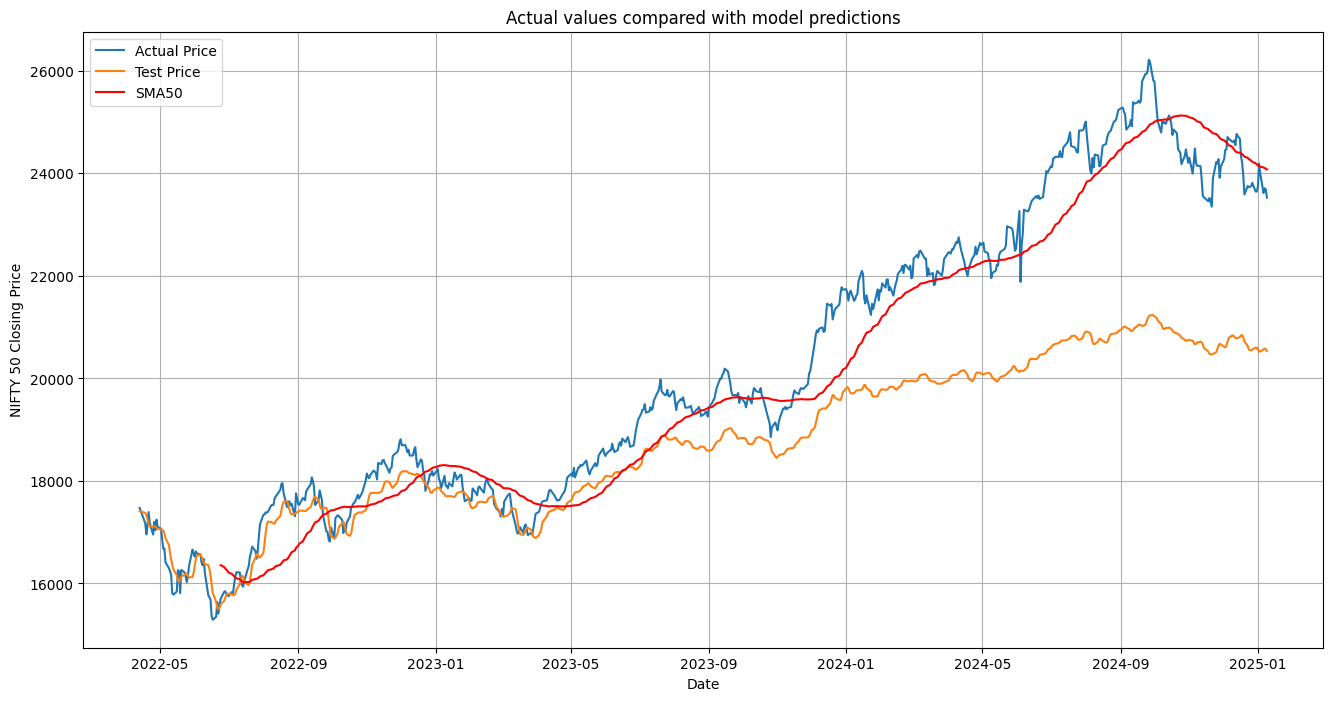

In [41]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 1.4**: INPUT LAYER(LSTM), HIDDEN LAYER(2LSTM), NEURONS:50, OPTIMIZER : RMSPROP & OUTPUT LAYER<a class="anchor"  id="model4"></a>

**1. MODEL CREATION**

In [42]:
# Building the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 80, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 80, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [43]:
#compiling model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

**3. MODEL TRAINING**

In [44]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0024
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 5.5868e-04
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 4.1304e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 3.3299e-04
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 2.8154e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 2.2210e-04
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 2.2452e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 2.1005e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 1.9706e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 2.0431e-04
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 1.7737e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 1.4947e-04
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 1.4767e-04
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/s

**4. MODEL PREDICTION**

In [45]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


**5. MODEL ERROR**

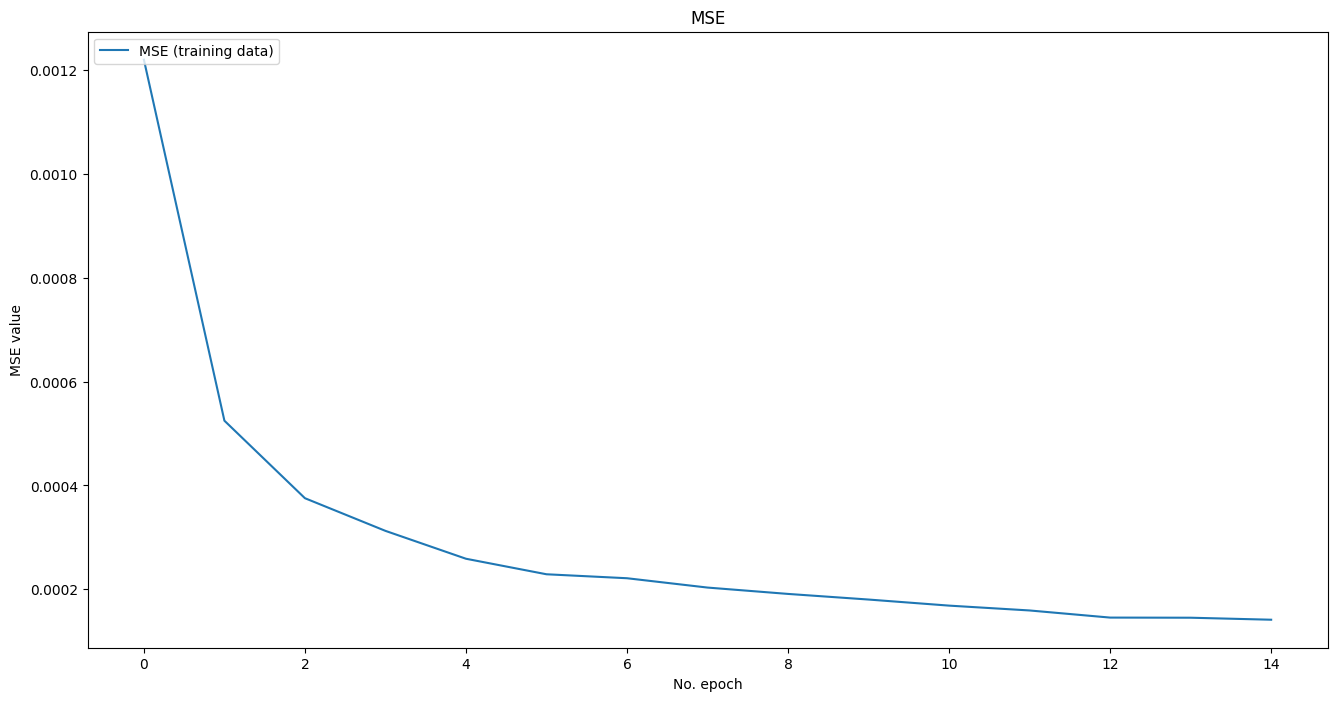

In [46]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [47]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

96.72889355612999

**6. GRAPHS OF PREDICTION**

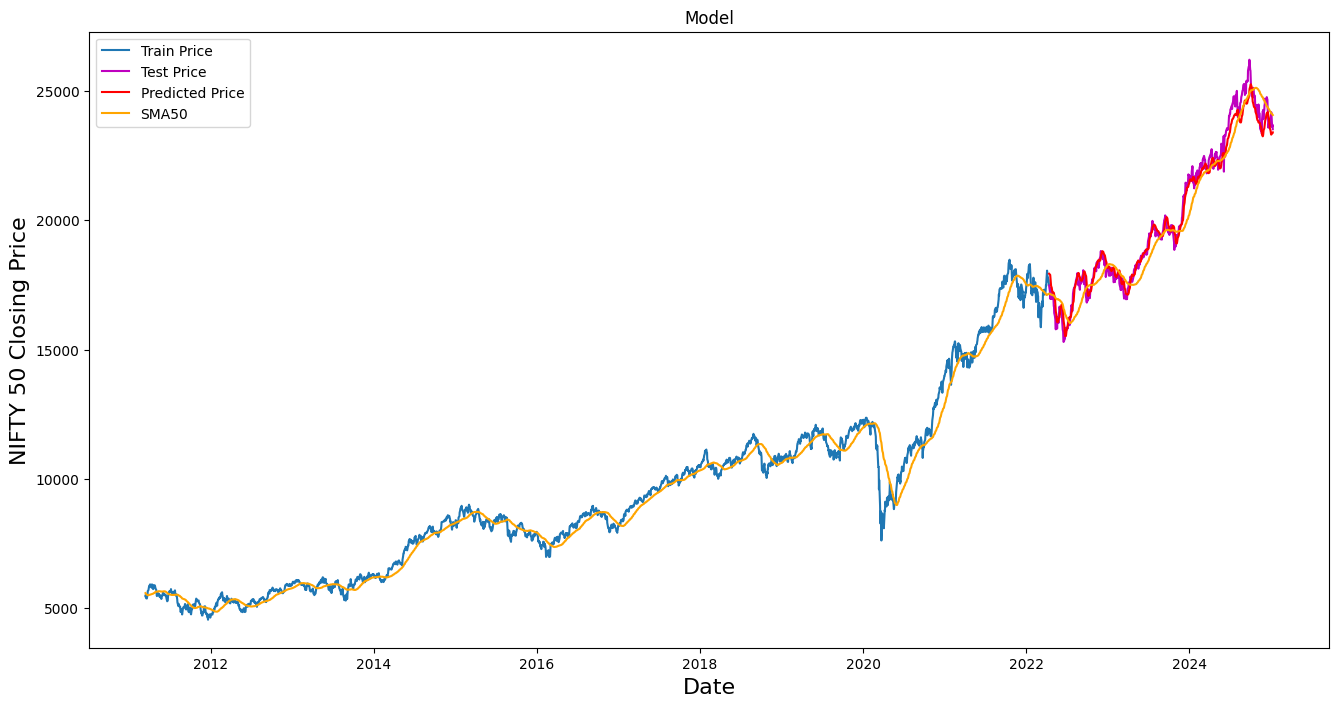

In [48]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [49]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17935.158203
2022-04-18  17173.650391  17889.734375
2022-04-19  16958.650391  17808.115234
2022-04-20  17136.550781  17687.572266
2022-04-21  17392.599609  17559.916016
...                  ...           ...
2025-01-03  24004.750000  23328.914062
2025-01-06  23616.050781  23366.318359
2025-01-07  23707.900391  23391.982422
2025-01-08  23688.949219  23403.943359
2025-01-09  23526.500000  23403.625000

[677 rows x 2 columns]

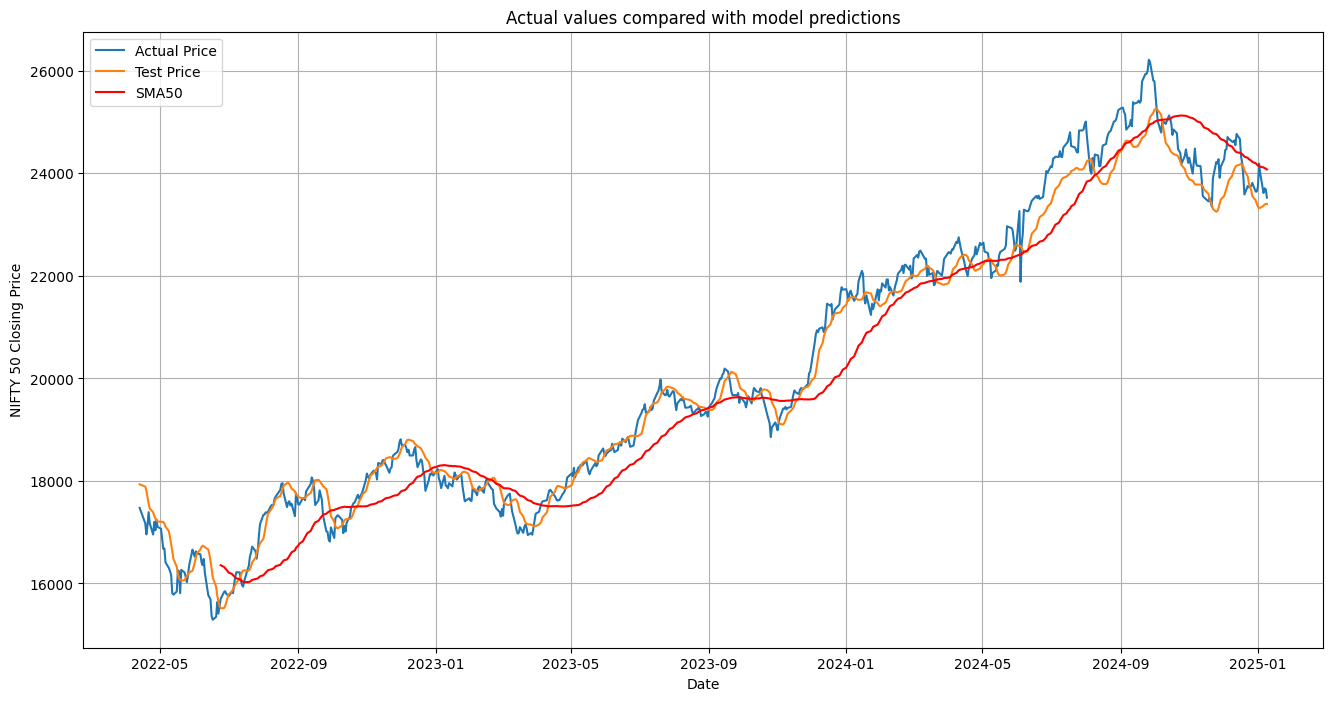

In [50]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 1.5**: INPUT LAYER(LSTM), HIDDEN LAYER(3LSTM+4DROPOUT), NEURONS:50, OPTIMIZER : RMSPROP & OUTPUT LAYER<a class="anchor"  id="model5"></a>

**1. MODEL CREATION**

In [51]:
# The LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 80, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 80, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 80, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [52]:
#compiling model
model.compile(optimizer='rmsprop', loss='mean_squared_error')

**3. MODEL TRAINING**

In [53]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - loss: 0.0053
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 0.0013
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 0.0010
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 9.3011e-04
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 8.1011e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - loss: 7.7067e-04
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 6.7339e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - loss: 6.7939e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 6.1715e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 5.6476e-04
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 5.7383e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - loss: 5.5812e-04
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 5.1428e-04
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - lo

**4. MODEL PREDICTION**

In [54]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


**5. MODEL ERROR**

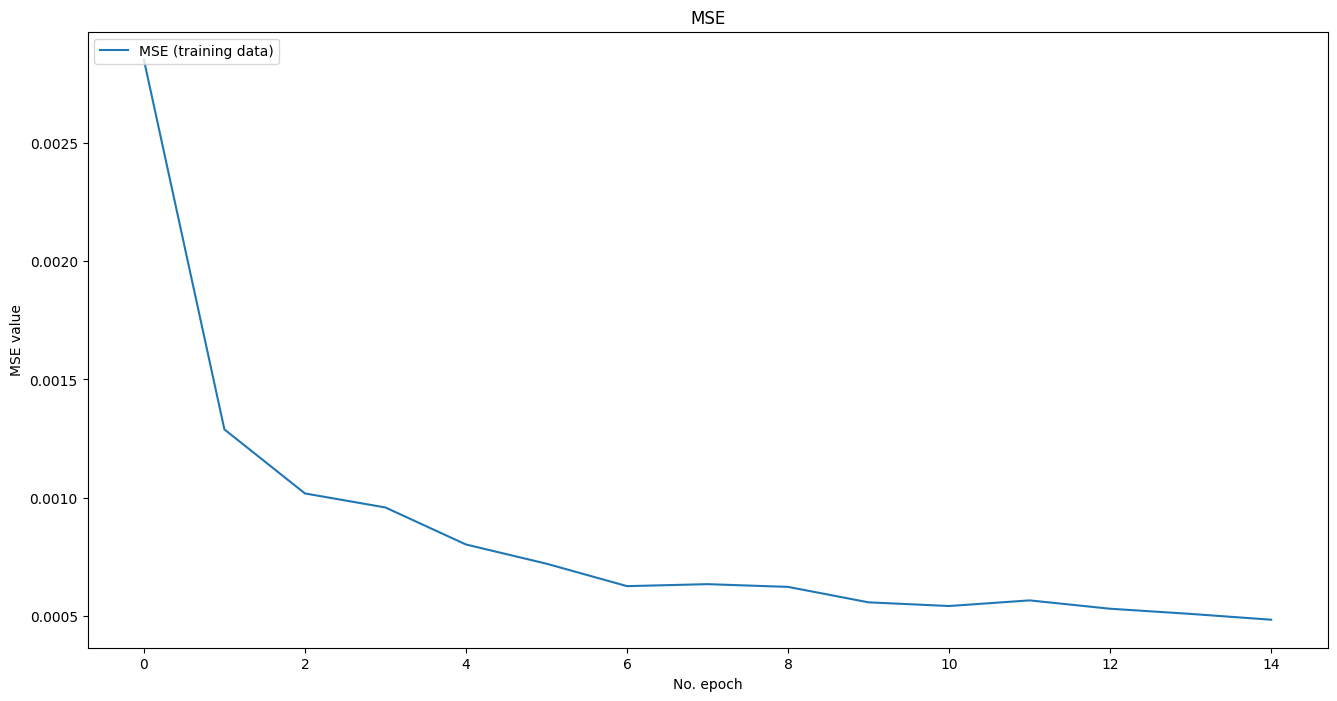

In [55]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [56]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

879.1390223989106

**6. GRAPHS OF PREDICTION**

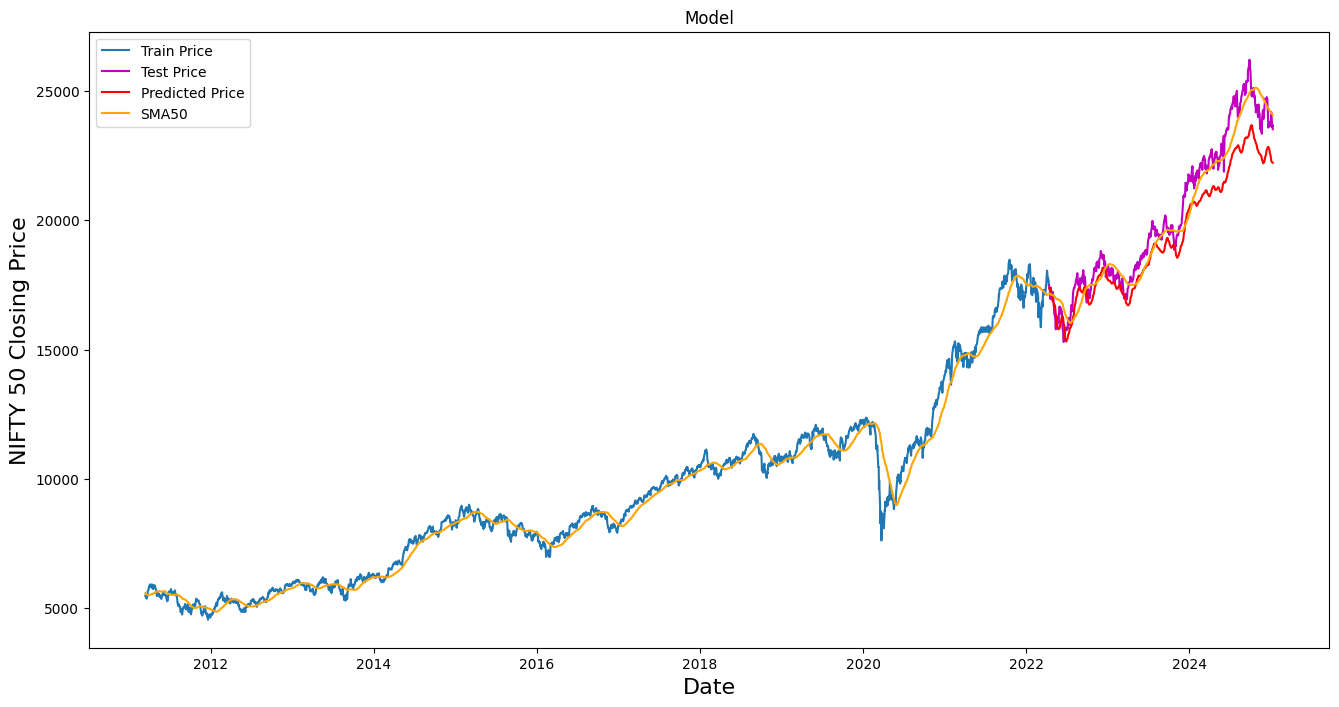

In [57]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [58]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17375.537109
2022-04-18  17173.650391  17384.777344
2022-04-19  16958.650391  17370.787109
2022-04-20  17136.550781  17329.888672
2022-04-21  17392.599609  17266.554688
...                  ...           ...
2025-01-03  24004.750000  22272.488281
2025-01-06  23616.050781  22248.601562
2025-01-07  23707.900391  22237.515625
2025-01-08  23688.949219  22233.365234
2025-01-09  23526.500000  22231.664062

[677 rows x 2 columns]

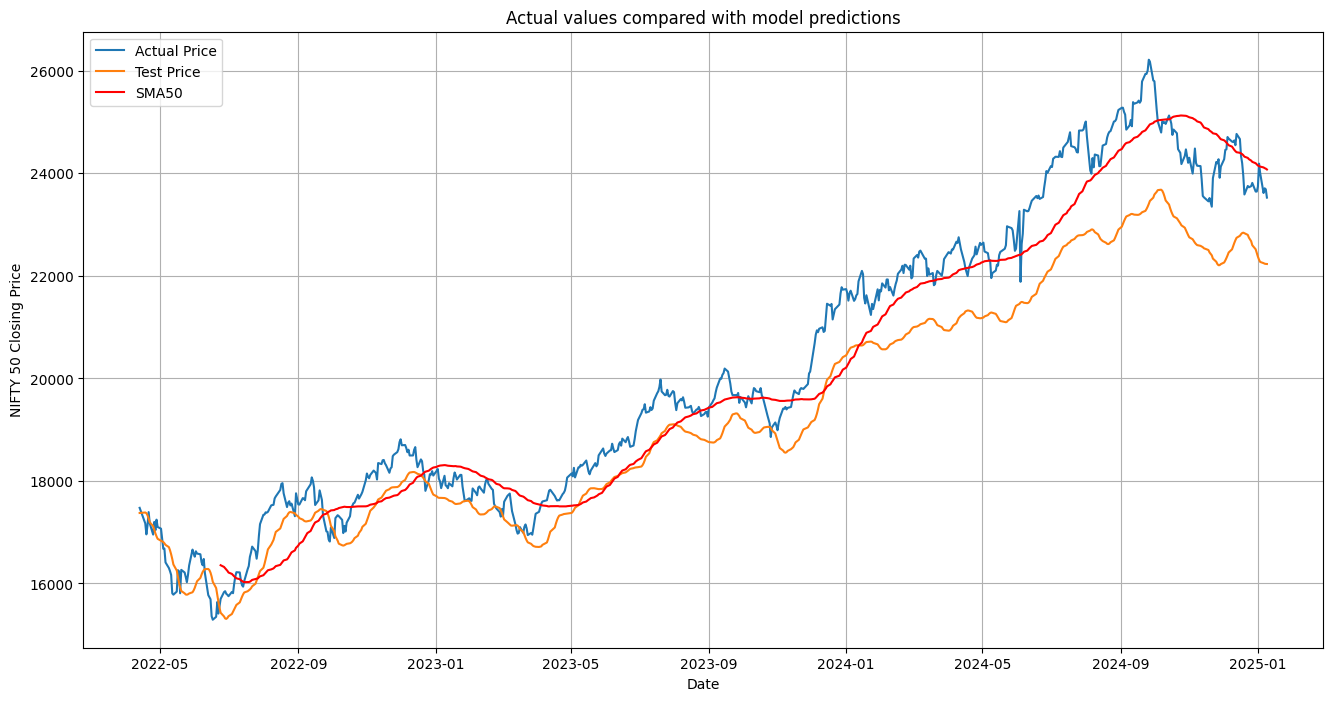

In [59]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 1.6**: INPUT LAYER(LSTM), HIDDEN LAYER(5LSTM), NEURONS: 128 OPTIMIZER : ADAM & OUTPUT LAYER<a class="anchor"  id="model6"></a>

**1. MODEL CREATION**

In [60]:
# Building the model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(1))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                       │ (None, 80, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 80, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 80, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 80, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 593,025 (2.26 MB)

 Trainable params: 593,025 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [61]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [62]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - loss: 0.0054
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 3.7396e-04
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 3.4320e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 3.2852e-04
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - loss: 2.1181e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 2.3378e-04
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 1.3199e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 1.1394e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 1.4175e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 9.2100e-05
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 1.7500e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 6.9708e-05
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - loss: 2.2614e-04
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/s

**4. MODEL PREDICTION**

In [63]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


**5. MODEL ERROR**

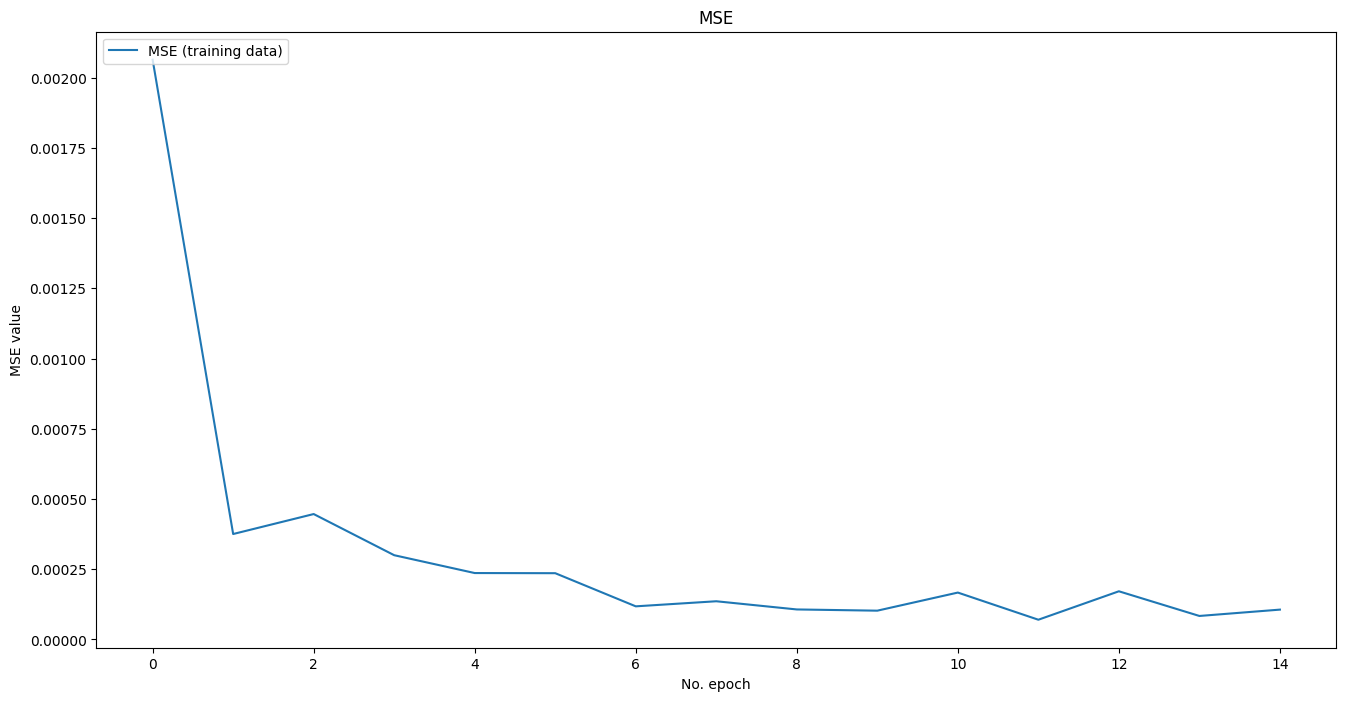

In [64]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [65]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

201.03778878554283

**6. GRAPHS OF PREDICTION**

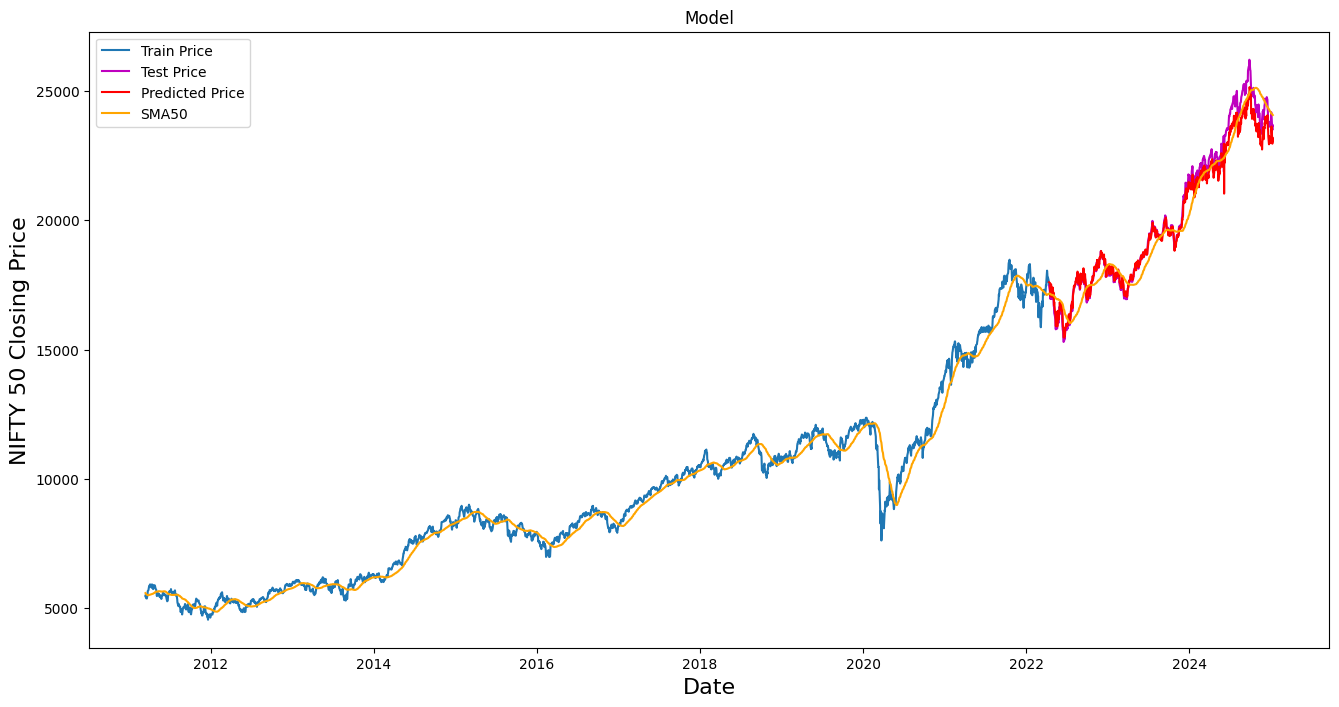

In [66]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [67]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17605.687500
2022-04-18  17173.650391  17566.669922
2022-04-19  16958.650391  17225.853516
2022-04-20  17136.550781  17058.843750
2022-04-21  17392.599609  17291.541016
...                  ...           ...
2025-01-03  24004.750000  23632.820312
2025-01-06  23616.050781  23204.287109
2025-01-07  23707.900391  22966.789062
2025-01-08  23688.949219  23199.621094
2025-01-09  23526.500000  23066.521484

[677 rows x 2 columns]

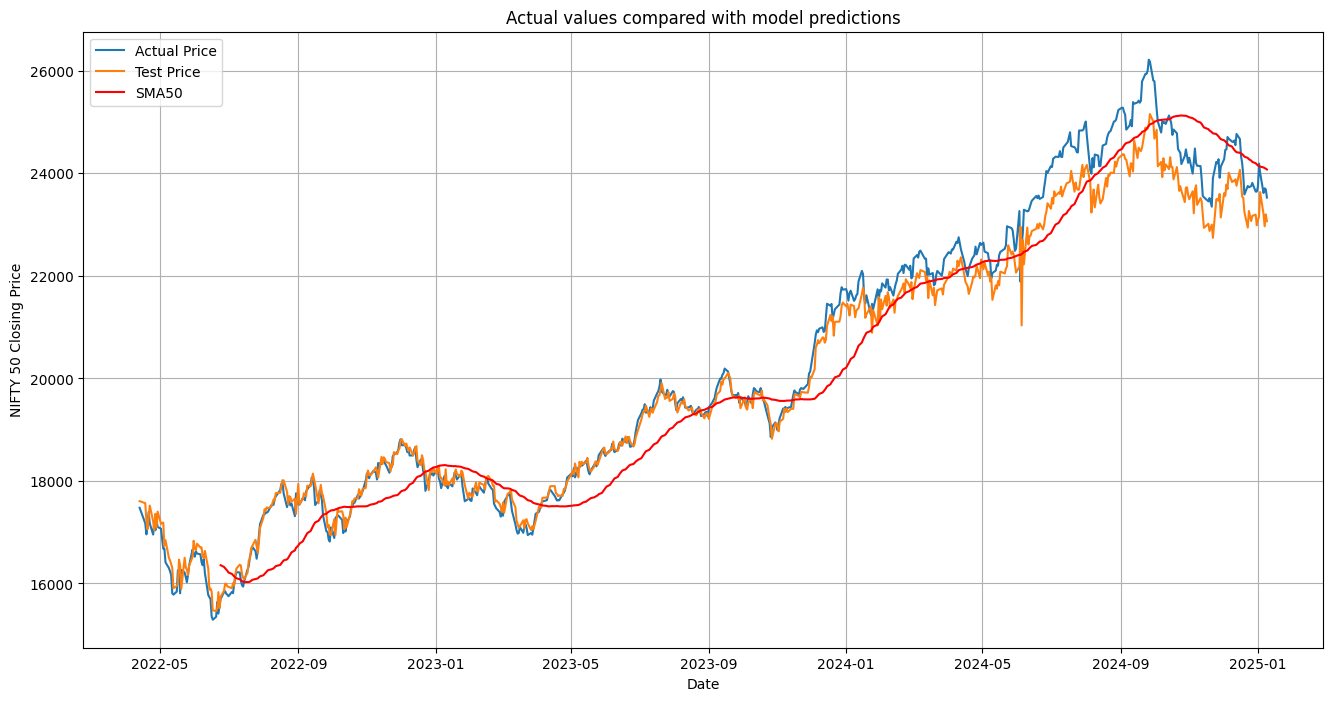

In [68]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

# **MODEL 2 : GATED RECURRENT UNIT MODEL [GRU]**<a class="anchor"  id="gru"></a>

## **MODEL 2.1**: INPUT LAYER(GRU), HIDDEN LAYER(1GRU), OPTIMIZER : ADAM & OUTPUT LAYER<a class="anchor"  id="model7"></a>

**1. MODEL CREATION**

In [69]:
# Building the model
model = Sequential()
model.add(GRU(4, return_sequences=True, activation='tanh', input_shape= (x_train.shape[1], 1 )))
model.add(GRU(4, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 80, 4)               │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 4)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [70]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [71]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0328
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 9.0009e-05
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - loss: 5.8527e-05
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 4.6718e-05
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 4.5111e-05
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 4.2457e-05
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 4.2214e-05
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 3.8172e-05
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 3.6201e-05
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 3.4940e-05
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 3.4620e-05
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 3.5396e-05
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 3.4787e-05
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/ste

**4. MODEL PREDICTION**

In [72]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


**5. MODEL ERROR**

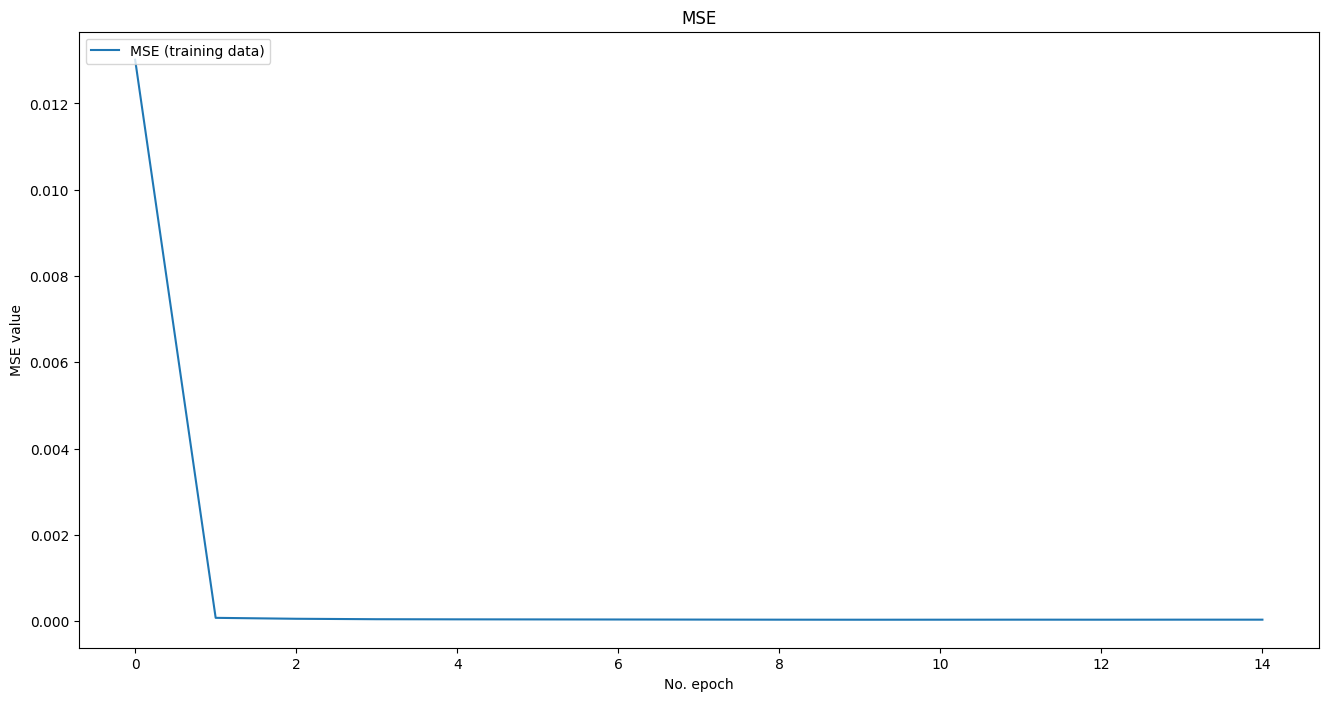

In [73]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [74]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

496.94566446639584

**6. GRAPHS OF PREDICTION**

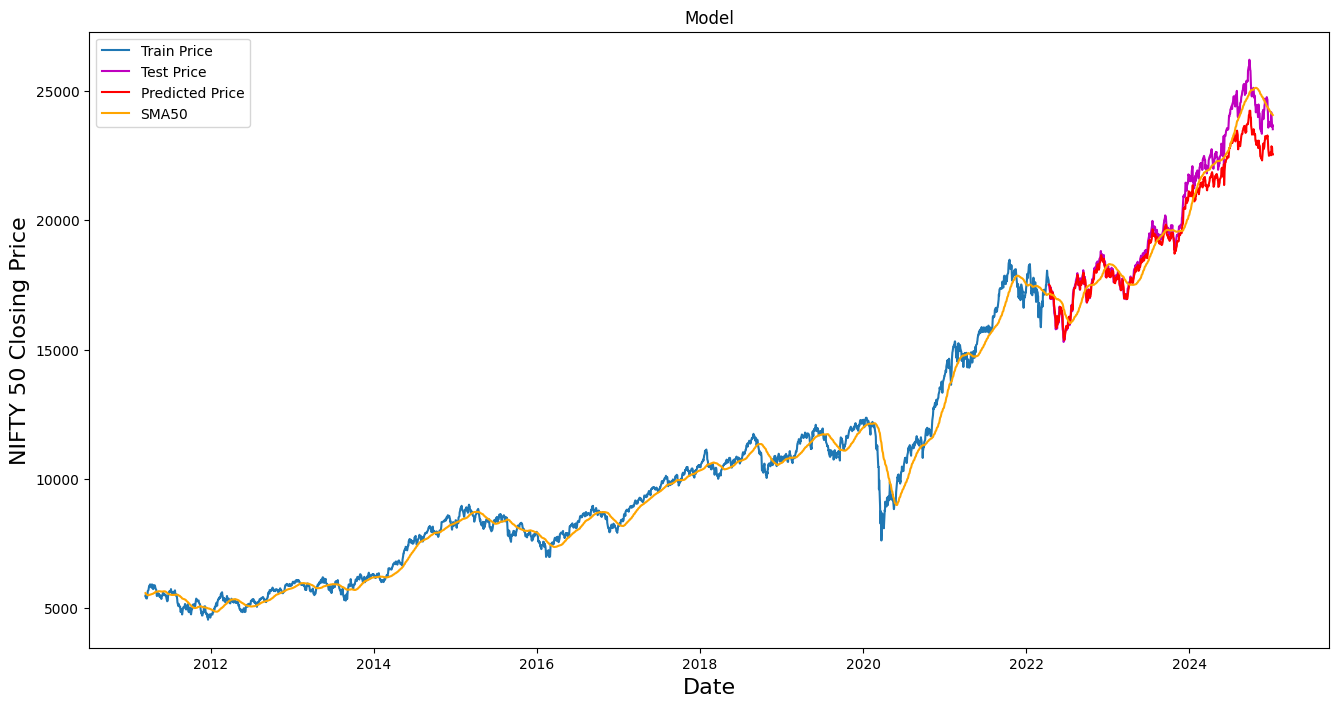

In [75]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [76]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17513.548828
2022-04-18  17173.650391  17446.748047
2022-04-19  16958.650391  17199.630859
2022-04-20  17136.550781  16981.492188
2022-04-21  17392.599609  17089.015625
...                  ...           ...
2025-01-03  24004.750000  22867.095703
2025-01-06  23616.050781  22809.261719
2025-01-07  23707.900391  22543.689453
2025-01-08  23688.949219  22548.478516
2025-01-09  23526.500000  22548.525391

[677 rows x 2 columns]

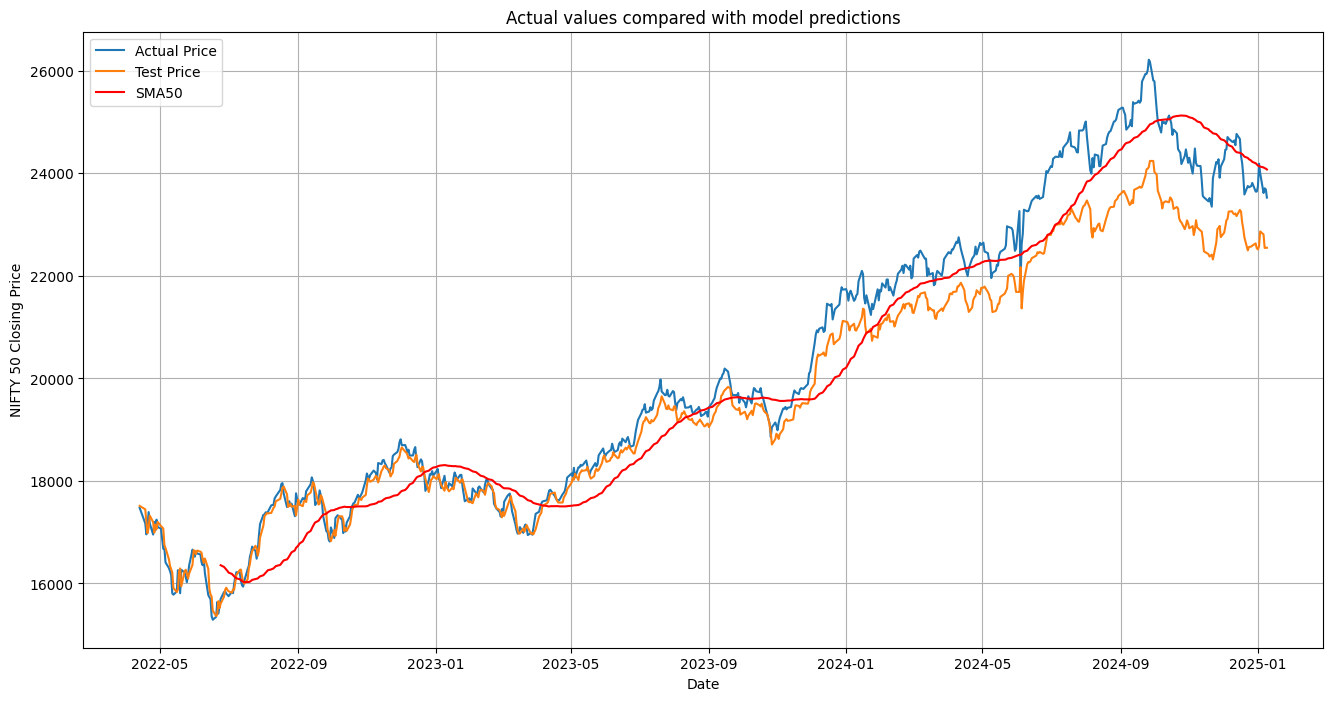

In [77]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 2.2**: INPUT LAYER(GRU), HIDDEN LAYER(2GRU), OPTIMIZER : ADAM & OUTPUT LAYER<a class="anchor"  id="model8"></a>

**1. MODEL CREATION**

In [78]:
# Building the model
model = Sequential()
model.add(GRU(4, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(GRU(4, return_sequences=True))
model.add(GRU(4))
model.add(Dense(1))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 80, 4)               │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 80, 4)               │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 4)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [79]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [80]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - loss: 0.0260
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 9.1510e-05
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 8.5969e-05
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - loss: 7.2516e-05
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 6.7676e-05
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - loss: 6.2539e-05
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - loss: 5.7596e-05
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 4.9098e-05
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 5.6415e-05
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - loss: 4.4120e-05
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 4.7538e-05
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 4.5280e-05
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - loss: 4.9539e-05
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/s

**4. MODEL PREDICTION**

In [81]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


**5. MODEL ERROR**

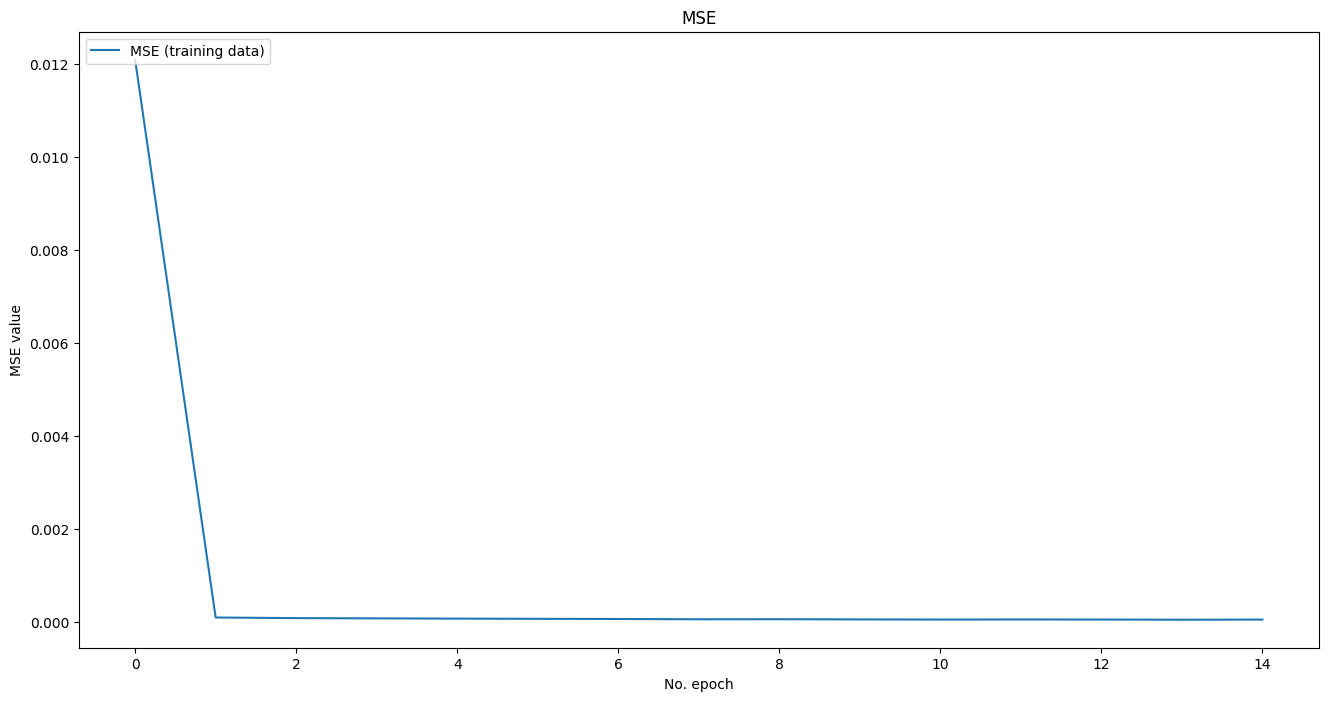

In [82]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [83]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

382.5624293182238

**6. GRAPHS OF PREDICTION**

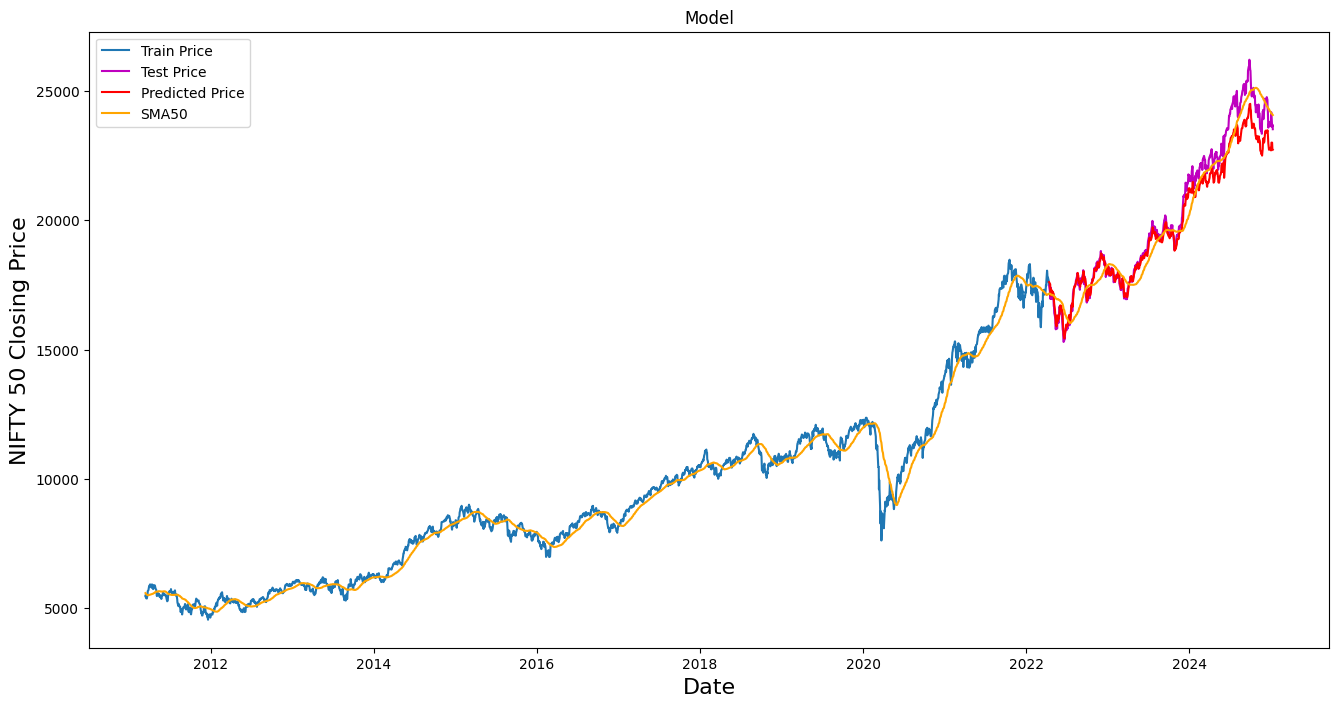

In [84]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [85]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17610.031250
2022-04-18  17173.650391  17526.382812
2022-04-19  16958.650391  17307.939453
2022-04-20  17136.550781  17085.292969
2022-04-21  17392.599609  17122.851562
...                  ...           ...
2025-01-03  24004.750000  23009.052734
2025-01-06  23616.050781  23006.771484
2025-01-07  23707.900391  22783.974609
2025-01-08  23688.949219  22740.501953
2025-01-09  23526.500000  22732.875000

[677 rows x 2 columns]

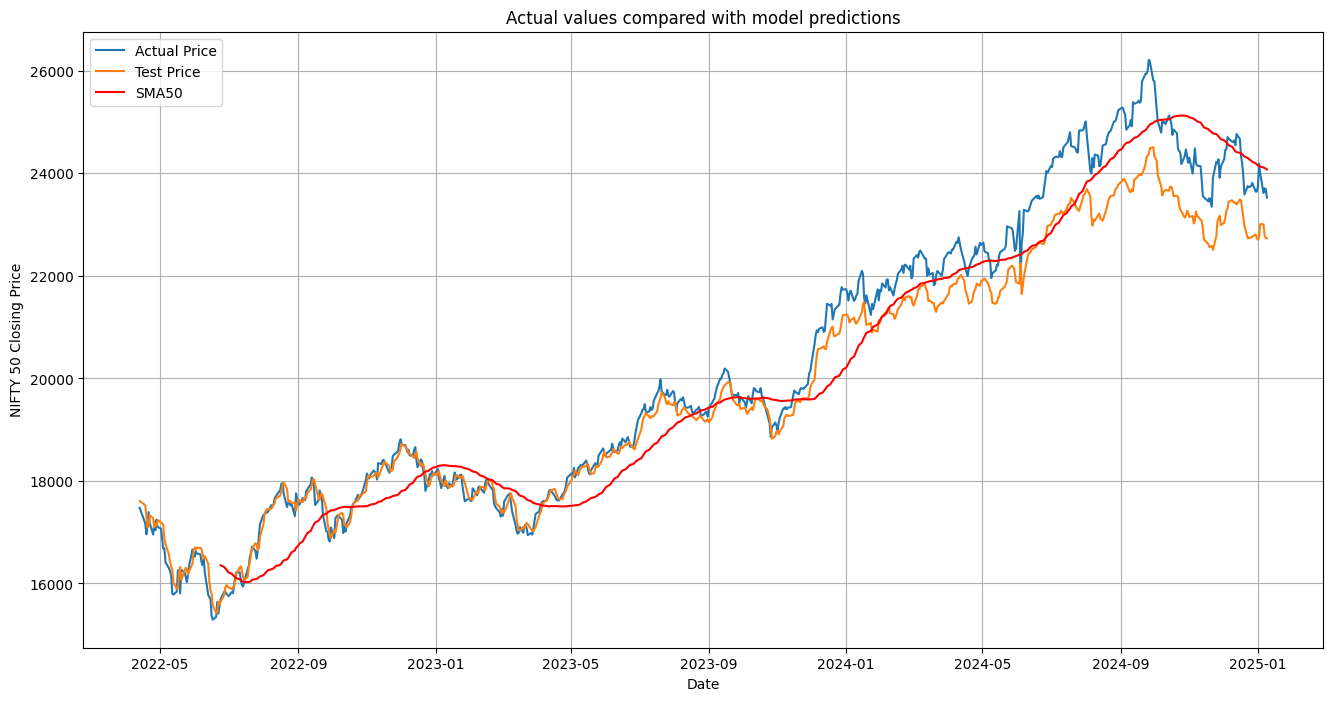

In [86]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 2.3**: INPUT LAYER(GRU), HIDDEN LAYER(3GRU), OPTIMIZER : ADAM & OUTPUT LAYER<a class="anchor"  id="model9"></a>

**1. MODEL CREATION**

In [87]:
# Building the model
model = Sequential()
model.add(GRU(32, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(GRU(16, return_sequences=True))
model.add(GRU(8, return_sequences=True))
model.add(GRU(4))
model.add(Dense(1))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                          │ (None, 80, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 80, 16)              │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 80, 8)               │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 4)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,557 (25.61 KB)

 Trainable params: 6,557 (25.61 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [88]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [89]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - loss: 0.0107
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - loss: 1.3143e-04
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - loss: 1.2521e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - loss: 8.5774e-05
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - loss: 7.4039e-05
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - loss: 6.6220e-05
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 60s 115ms/step - loss: 6.4070e-05
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - loss: 5.2788e-05
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 59s 111ms/step - loss: 6.6931e-05
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 56s 105ms/step - loss: 6.3362e-05
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 75s 142ms/step - loss: 5.6324e-05
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 63s 119ms/step - loss: 4.7938e-05
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 59s 112ms/step - loss: 4.1286e-05
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 57

**4. MODEL PREDICTION**

In [90]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step


**5. MODEL ERROR**

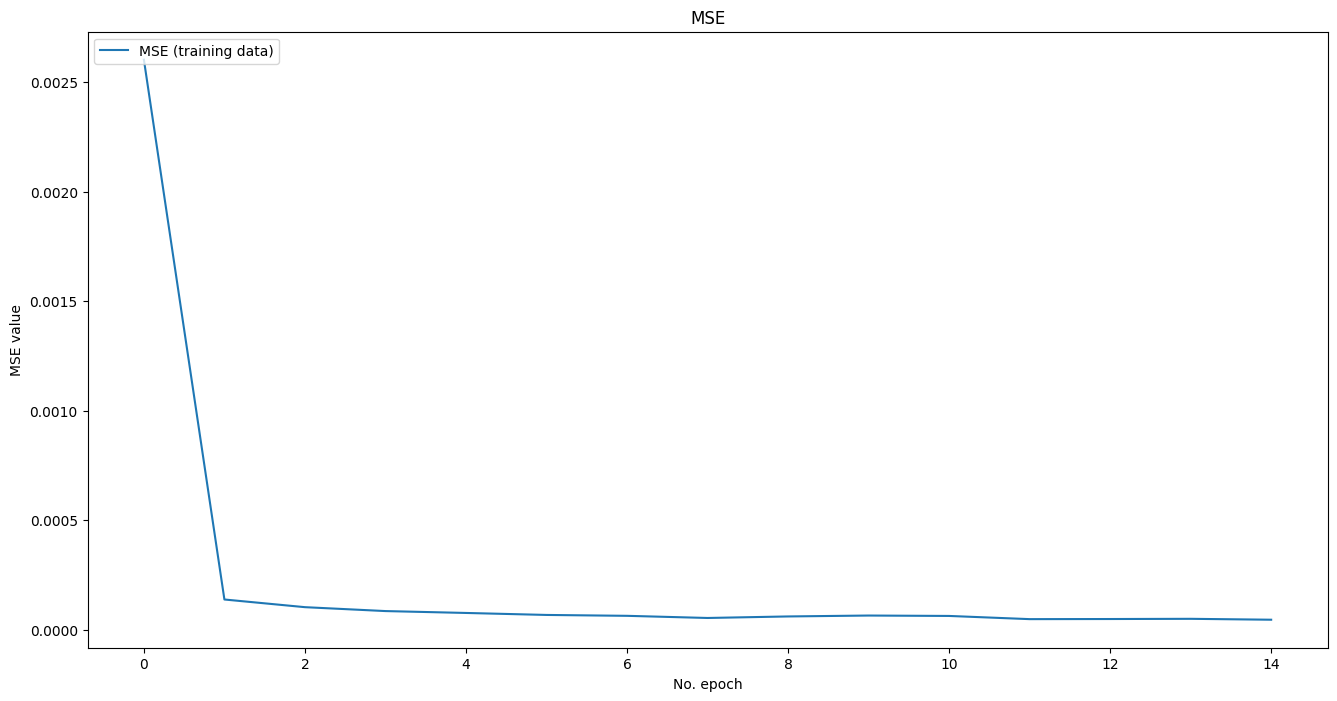

In [91]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [92]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

714.2067196731905

**6. GRAPHS OF PREDICTION**

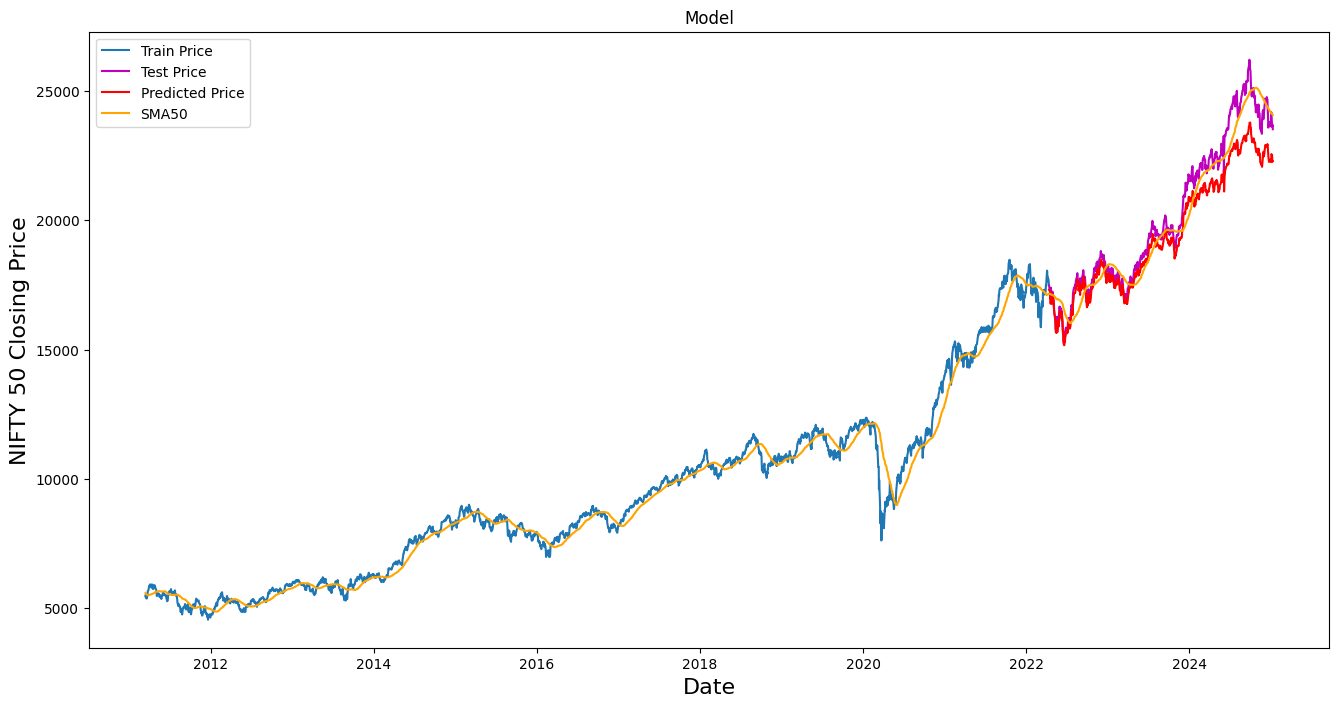

In [93]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [94]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17311.761719
2022-04-18  17173.650391  17261.072266
2022-04-19  16958.650391  16982.505859
2022-04-20  17136.550781  16771.529297
2022-04-21  17392.599609  16938.044922
...                  ...           ...
2025-01-03  24004.750000  22563.980469
2025-01-06  23616.050781  22499.757812
2025-01-07  23707.900391  22272.511719
2025-01-08  23688.949219  22296.433594
2025-01-09  23526.500000  22288.923828

[677 rows x 2 columns]

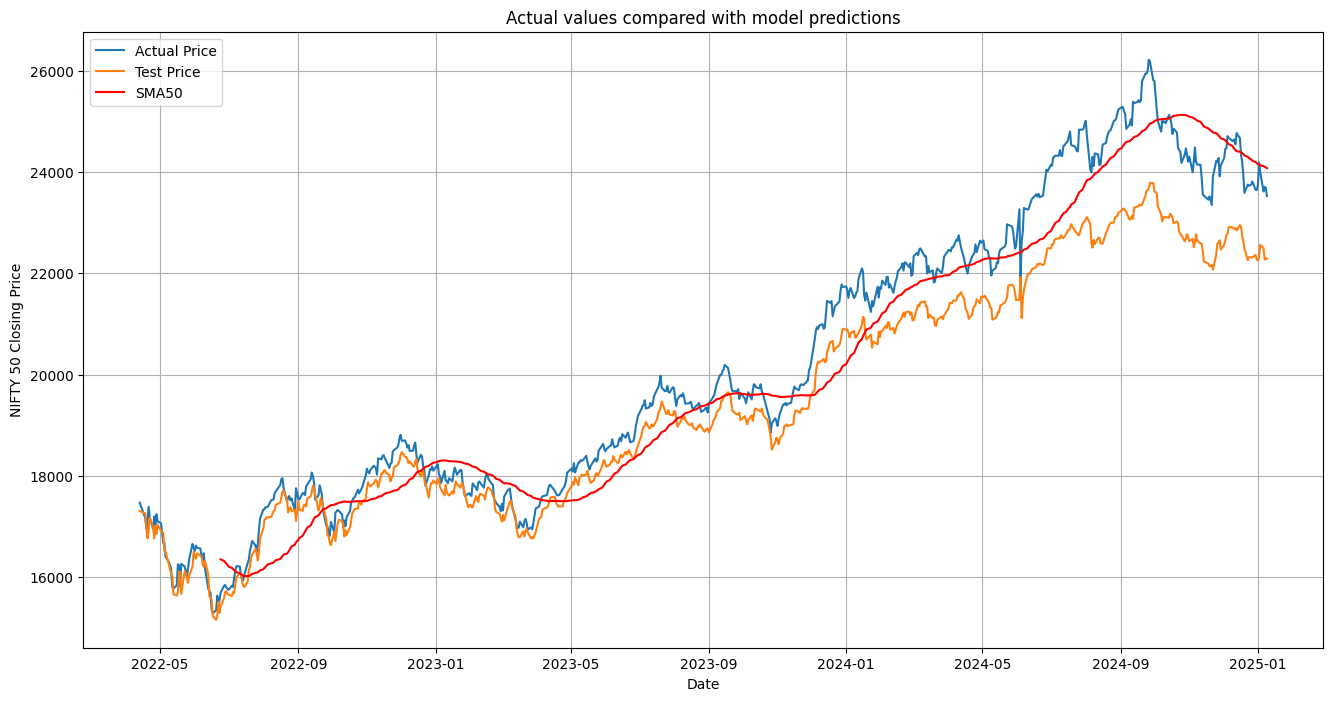

In [95]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 2.4**: INPUT LAYER(GRU), HIDDEN LAYER(2GRU), NEURONS:50, OPTIMIZER : SGD & OUTPUT LAYER<a class="anchor"  id="model10"></a>

**1. MODEL CREATION**

In [96]:
# Building the model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(GRU(50, return_sequences=True))
model.add(GRU(50))
model.add(Dense(1))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_9 (GRU)                          │ (None, 80, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ (None, 80, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,601 (150.79 KB)

 Trainable params: 38,601 (150.79 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [97]:
#compiling model
model.compile(optimizer='SGD', loss='mean_squared_error')

**3. MODEL TRAINING**

In [98]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 53s 88ms/step - loss: 0.0230
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - loss: 0.0038
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - loss: 2.2729e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 47s 88ms/step - loss: 8.5220e-05
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 64s 122ms/step - loss: 7.7905e-05
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - loss: 8.5823e-05
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 53s 101ms/step - loss: 8.0717e-05
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 52s 98ms/step - loss: 9.8599e-05
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - loss: 8.5178e-05
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 43s 82ms/step - loss: 9.5878e-05
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - loss: 9.2886e-05
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - loss: 8.5799e-05
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 85s 92ms/step - loss: 8.6794e-05
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 79s 87ms/ste

**4. MODEL PREDICTION**

In [99]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step


**5. MODEL ERROR**

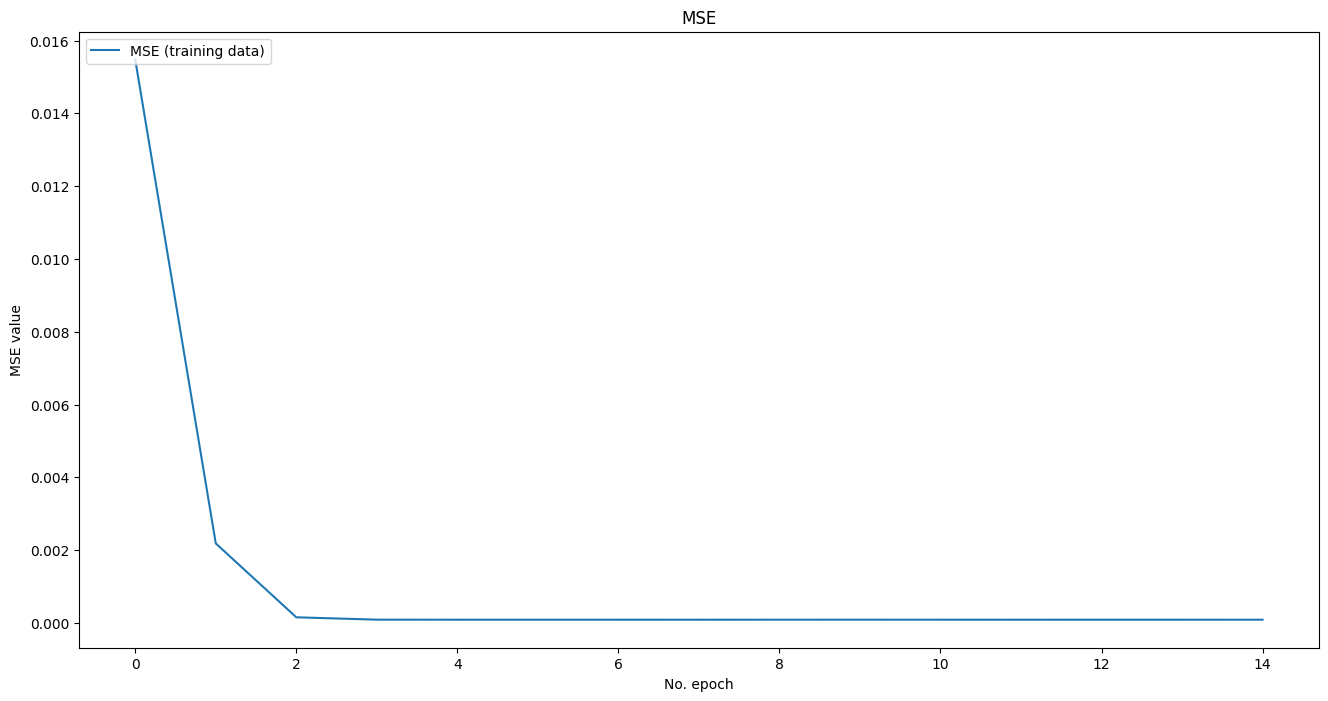

In [100]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [101]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

223.1362658096381

**6. GRAPHS OF PREDICTION**

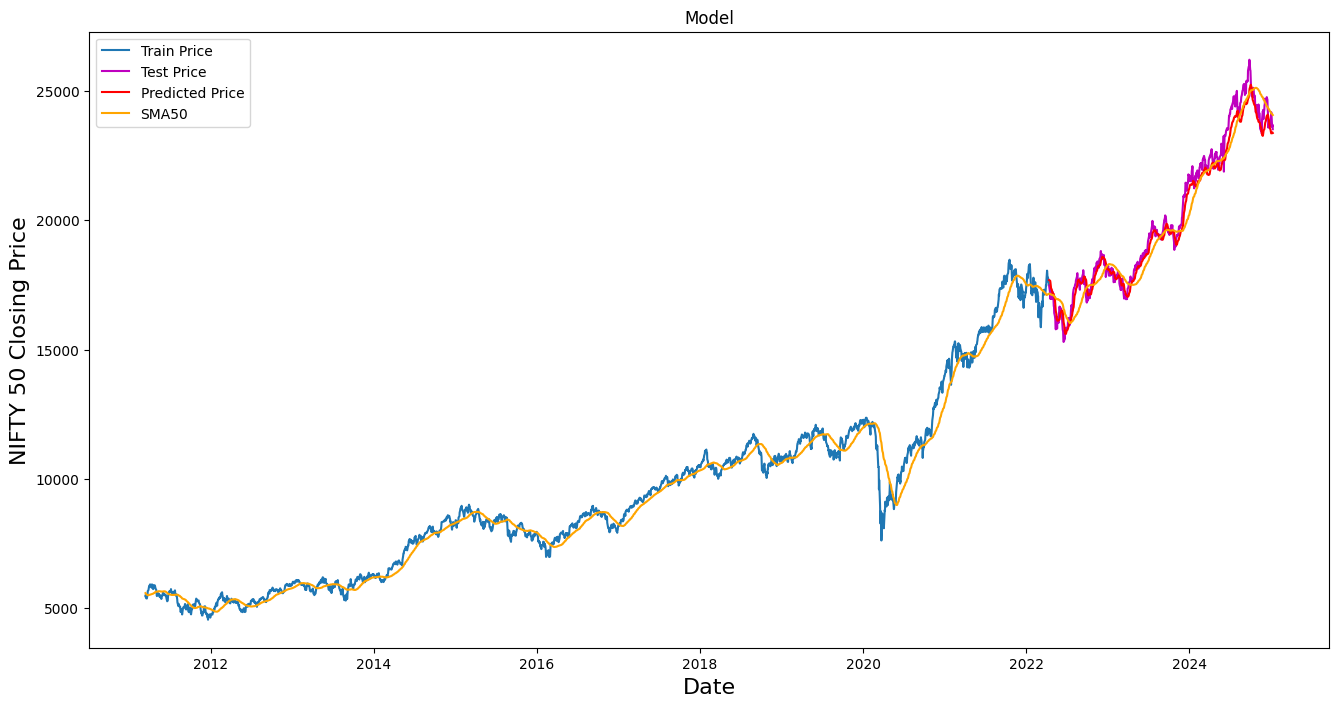

In [102]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [103]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17687.964844
2022-04-18  17173.650391  17662.017578
2022-04-19  16958.650391  17605.396484
2022-04-20  17136.550781  17516.283203
2022-04-21  17392.599609  17426.943359
...                  ...           ...
2025-01-03  24004.750000  23374.324219
2025-01-06  23616.050781  23402.087891
2025-01-07  23707.900391  23407.640625
2025-01-08  23688.949219  23398.185547
2025-01-09  23526.500000  23380.177734

[677 rows x 2 columns]

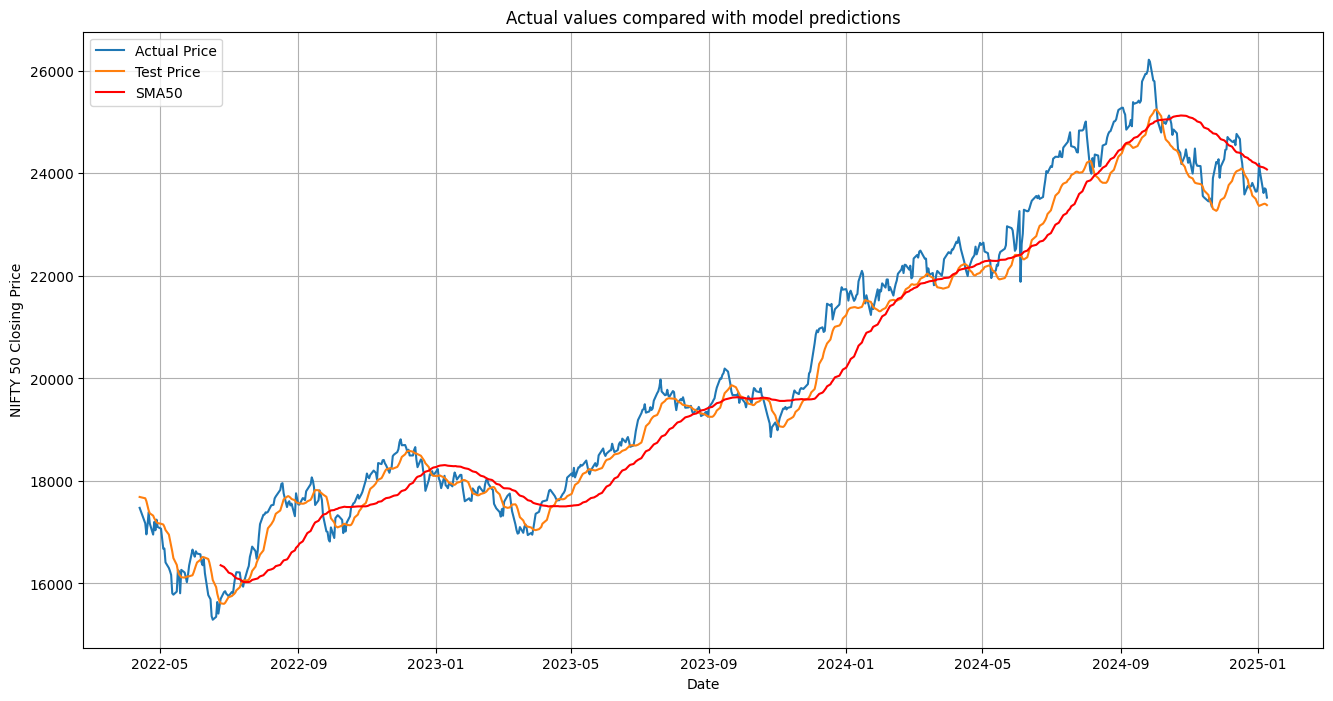

In [104]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 2.5**: INPUT LAYER(GRU), HIDDEN LAYER(3GRU+4DROPOUT), NEURONS:50, OPTIMIZER : SGD & OUTPUT LAYER<a class="anchor"  id="model11"></a>

**1. MODEL CREATION**

In [105]:
# The GRU architecture
model = Sequential()
# First GRU layer with Dropout regularisation
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.2))
# Second GRU layer
model.add(GRU(units=50, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
# Third GRU layer
model.add(GRU(units=50, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
# Fourth GRU layer
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
# The output layer
model.add(Dense(units=1))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                         │ (None, 80, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_13 (GRU)                         │ (None, 80, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_14 (GRU)                         │ (None, 80, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_15 (GRU)                         │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [106]:
#compiling model
model.compile(optimizer='SGD', loss='mean_squared_error')

**3. MODEL TRAINING**

In [107]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 67s 117ms/step - loss: 0.0199
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 62s 117ms/step - loss: 0.0019
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 62s 117ms/step - loss: 0.0012
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 61s 116ms/step - loss: 0.0011
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 62s 117ms/step - loss: 8.8934e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 61s 117ms/step - loss: 8.7423e-04
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 62s 117ms/step - loss: 9.5143e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 60s 115ms/step - loss: 9.9614e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 61s 116ms/step - loss: 8.2357e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 62s 117ms/step - loss: 8.5351e-04
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 61s 116ms/step - loss: 7.6981e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 61s 116ms/step - loss: 7.7473e-04
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 57s 108ms/step - loss: 9.1250e-04
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/

**4. MODEL PREDICTION**

In [108]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


**5. MODEL ERROR**

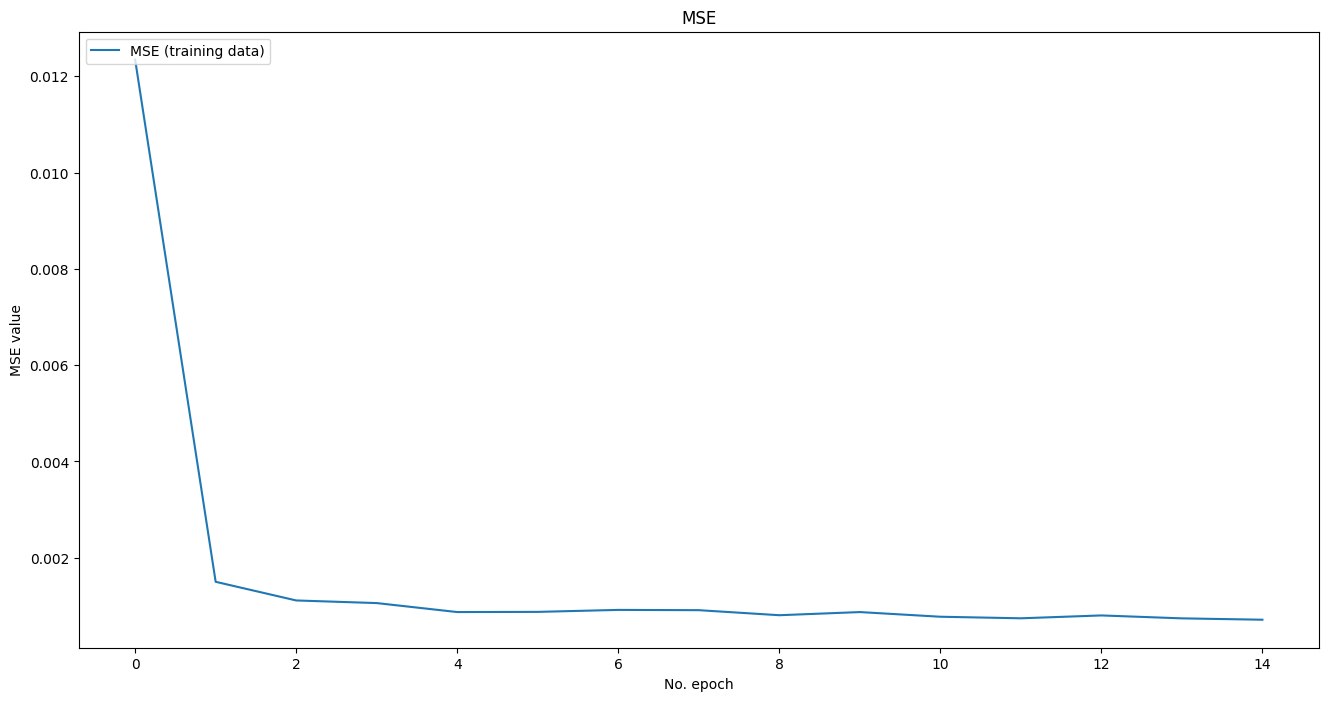

In [109]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [110]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

567.4347203309638

**6. GRAPHS OF PREDICTION**

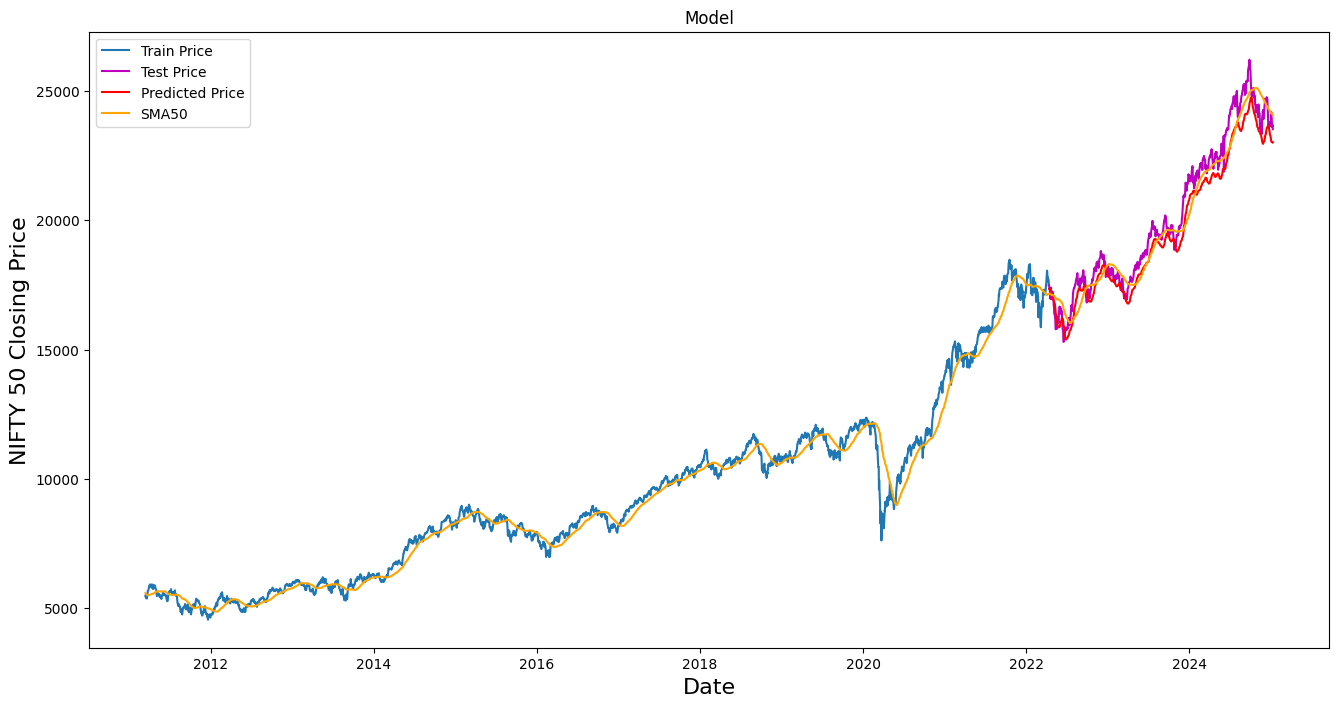

In [111]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [112]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17351.623047
2022-04-18  17173.650391  17356.949219
2022-04-19  16958.650391  17339.687500
2022-04-20  17136.550781  17296.353516
2022-04-21  17392.599609  17236.425781
...                  ...           ...
2025-01-03  24004.750000  23038.191406
2025-01-06  23616.050781  23031.232422
2025-01-07  23707.900391  23028.830078
2025-01-08  23688.949219  23023.796875
2025-01-09  23526.500000  23014.025391

[677 rows x 2 columns]

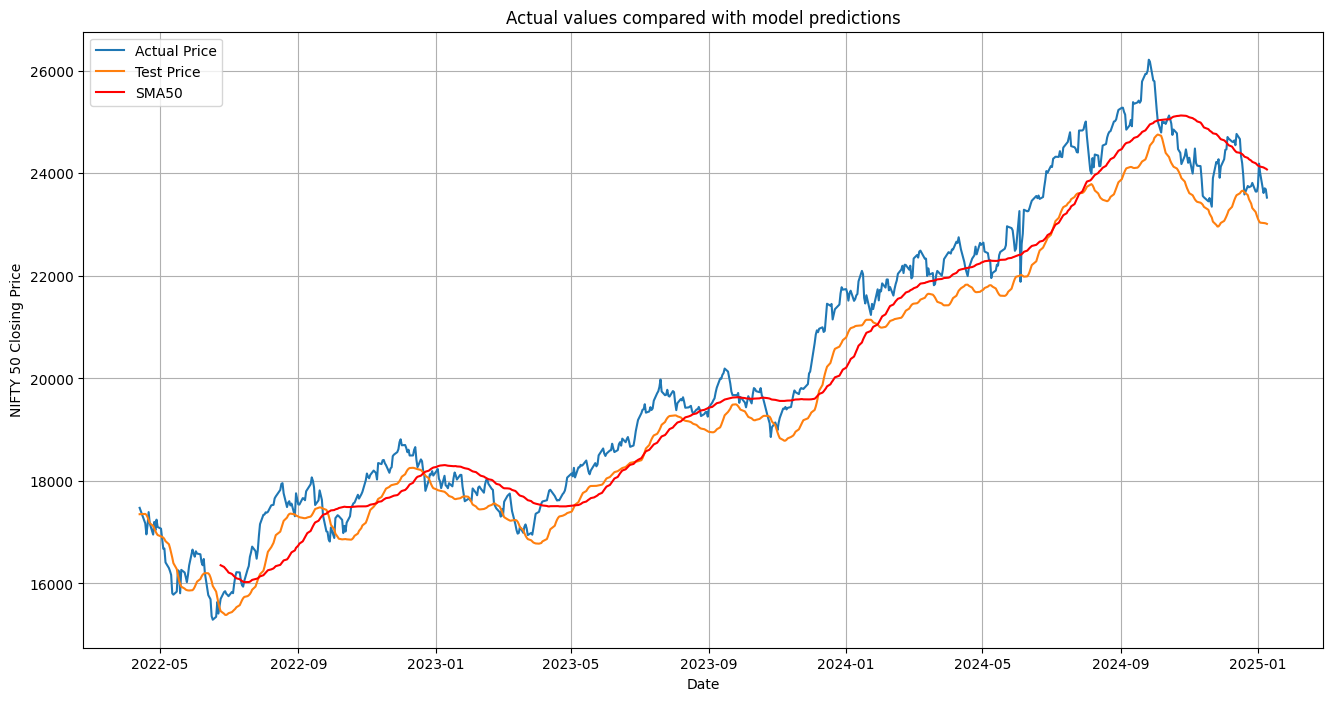

In [113]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself

## **MODEL 2.6**: INPUT LAYER(GRU), HIDDEN LAYER(5GRU), NEURONS:128, OPTIMIZER : ADAM & OUTPUT LAYER<a class="anchor"  id="model12"></a>

**1. MODEL CREATION**

In [114]:
# Building the model
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape= (x_train.shape[1], 1 )))
model.add(GRU(128, return_sequences=True))
model.add(GRU(128, return_sequences=True))
model.add(GRU(128, return_sequences=True))
model.add(GRU(128))
model.add(Dense(1))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_16 (GRU)                         │ (None, 80, 128)             │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_17 (GRU)                         │ (None, 80, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_18 (GRU)                         │ (None, 80, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_19 (GRU)                         │ (None, 80, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_20 (GRU)                         │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 446,721 (1.70 MB)

 Trainable params: 446,721 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

**2. MODEL COMPLIE**

In [115]:
#compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

**3. MODEL TRAINING**

In [116]:
#Training
history = model.fit(x_train, y_train, batch_size = 5, epochs = 15)

Epoch 1/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 85s 131ms/step - loss: 0.0029
Epoch 2/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 66s 126ms/step - loss: 2.4348e-04
Epoch 3/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 67s 128ms/step - loss: 1.4833e-04
Epoch 4/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 67s 128ms/step - loss: 1.4027e-04
Epoch 5/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 68s 128ms/step - loss: 1.1819e-04
Epoch 6/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 69s 131ms/step - loss: 7.8978e-05
Epoch 7/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 68s 130ms/step - loss: 1.5393e-04
Epoch 8/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 68s 130ms/step - loss: 1.8956e-04
Epoch 9/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 66s 126ms/step - loss: 1.1386e-04
Epoch 10/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 69s 131ms/step - loss: 1.1811e-04
Epoch 11/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 66s 125ms/step - loss: 4.1321e-04
Epoch 12/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 68s 129ms/step - loss: 5.5177e-05
Epoch 13/15
527/527 ━━━━━━━━━━━━━━━━━━━━ 69s 130ms/step - loss: 8.5451e-05
Epoch 14/15
527/527 ━━━━━━━━━━━━━━━━━━

**4. MODEL PREDICTION**

In [117]:
#Getting predicted values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step


**5. MODEL ERROR**

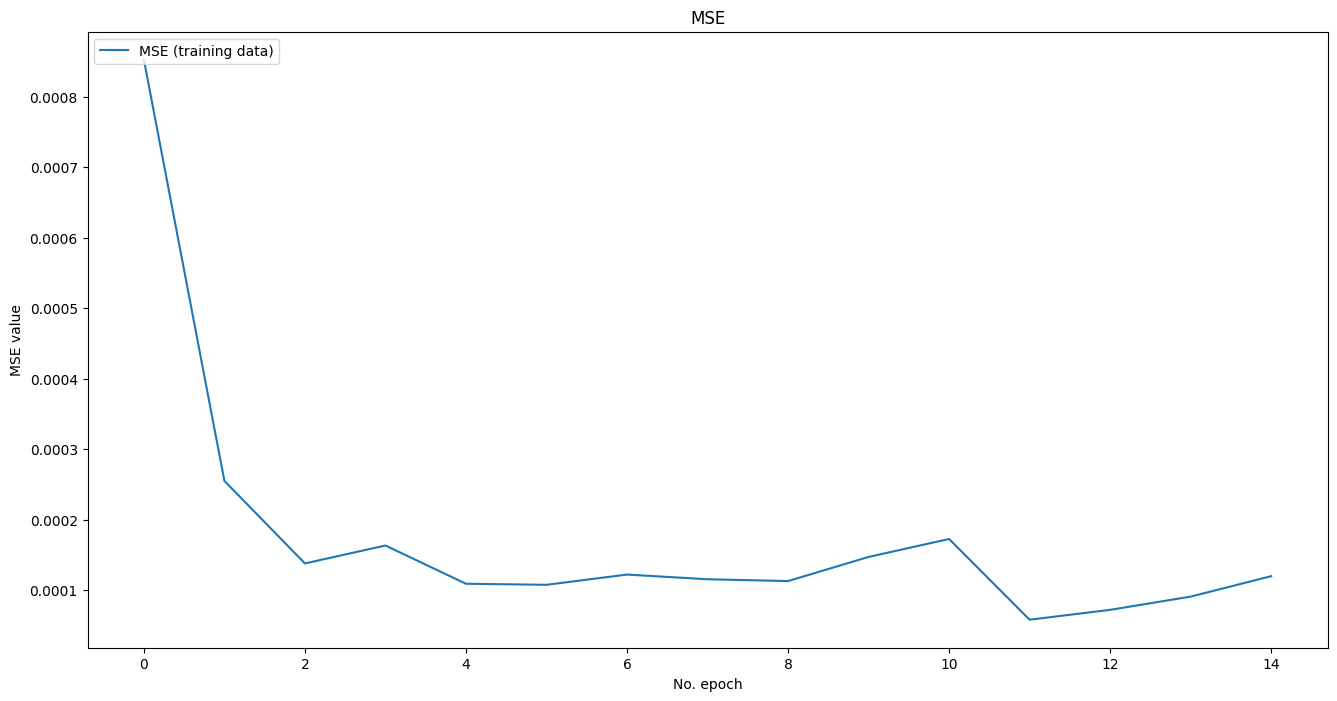

In [118]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='MSE (training data)')
plt.title('MSE')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [119]:
#get (RMSE)= root mean squared error.. shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

618.6879024533789

**6. GRAPHS OF PREDICTION**

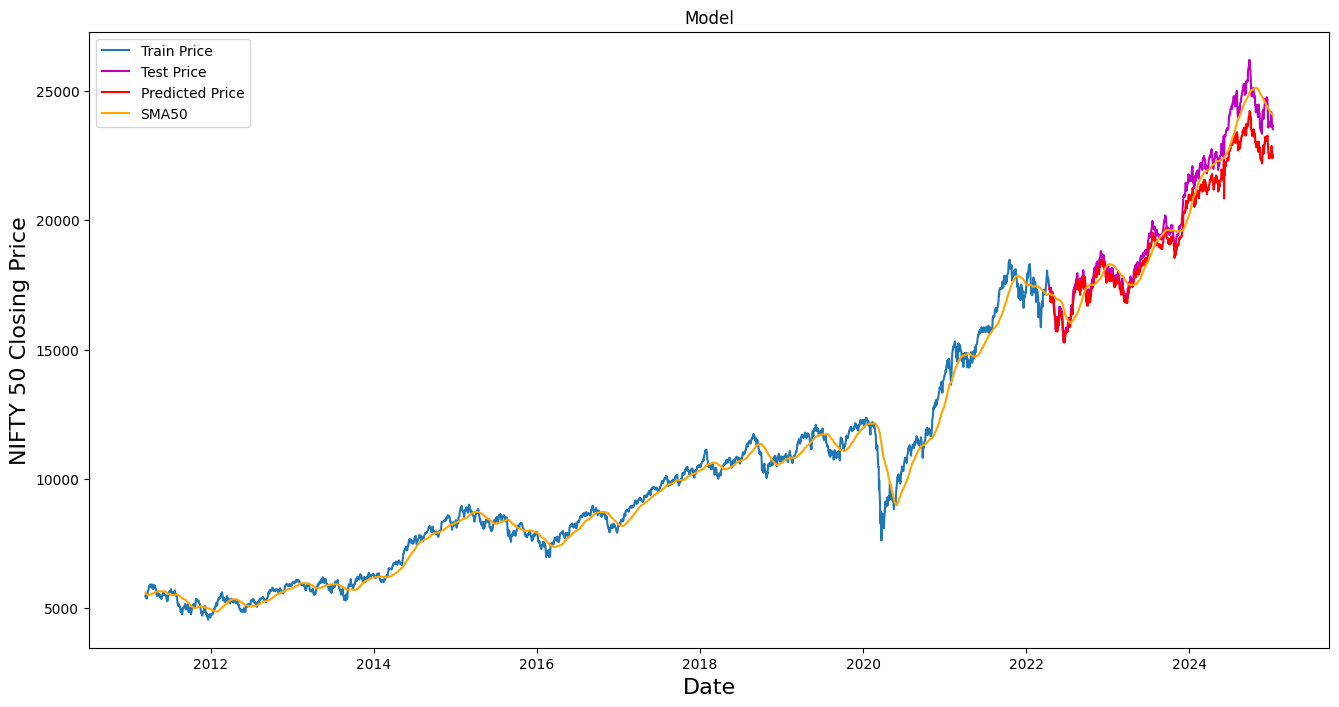

In [120]:
#Ploting the data
train = data[:training_data_len]
test = data[training_data_len:]
test['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('NIFTY 50 Closing Price', fontsize = 16)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], color = 'm')
plt.plot(test['predictions'], color = 'red')
plt.plot(nifty_50_df.index,nifty_50_df.SMA50, label = "Moving Average", color = 'orange')
plt.legend(['Train Price', 'Test Price', 'Predicted Price', 'SMA50'], loc= 'upper left')
plt.show()

In [121]:
# the actual values  and predicted prices
test

Price              Close   predictions
Ticker             ^NSEI              
Date                                  
2022-04-13  17475.650391  17349.306641
2022-04-18  17173.650391  17307.521484
2022-04-19  16958.650391  16999.500000
2022-04-20  17136.550781  16839.992188
2022-04-21  17392.599609  17029.783203
...                  ...           ...
2025-01-03  24004.750000  22881.175781
2025-01-06  23616.050781  22629.054688
2025-01-07  23707.900391  22403.064453
2025-01-08  23688.949219  22538.535156
2025-01-09  23526.500000  22463.289062

[677 rows x 2 columns]

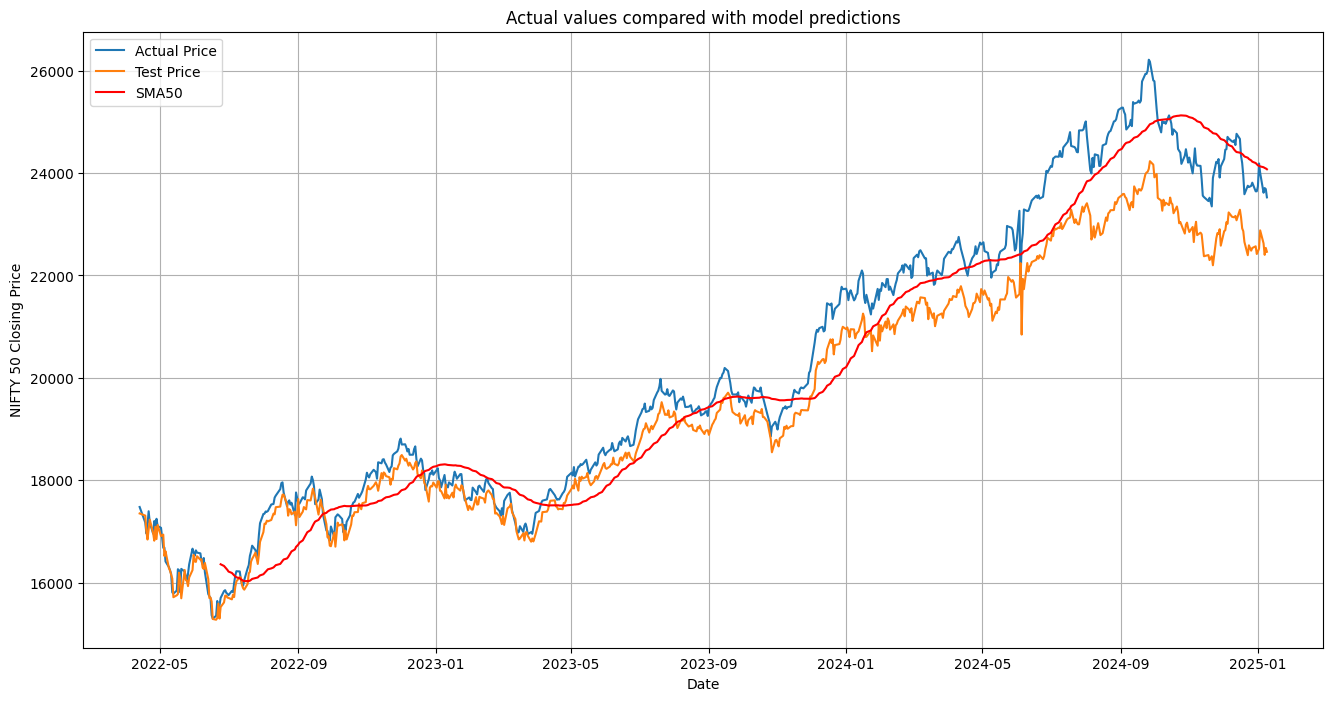

In [122]:
#visualizing predicted and actual values
test['SMA50'] = test['Close'].rolling(50).mean()
plt.figure(figsize = (16,8)) #plot size
plt.title('Actual values compared with model predictions') # setting plot title
plt.ylabel('NIFTY 50 Closing Price')
plt.xlabel('Date')
plt.plot(test['Close'])
plt.plot(test['predictions'])
plt.plot(test['SMA50'], color = 'red')
plt.grid()
plt.legend(['Actual Price','Test Price','SMA50'], loc= 'upper left')
plt.show()
 # defining plot itself